In [161]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Here we go again!!! 
## Time to get creative and help our fellow mates stuck in space!!! Come onnn, take my hand....

![saving](https://pyxis.nymag.com/v1/imgs/00a/407/065c31c680d938dd607e42f8f1f8b58c81-15-star-wars-best-moments-2.rsquare.w700.jpg)

In [162]:
# import libraries to move forward and analyze the data
import sklearnex
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

# Plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go

# Statical measures
from scipy.stats import skew, kurtosis, stats
import scipy.stats as stats

# Clustering
from sklearnex.cluster import KMeans, DBSCAN

# Data Transformations
from sklearn.compose import make_column_transformer, make_column_selector

# Handling missing values
from sklearn.impute import SimpleImputer

# Principal Component Analysis (PCA)
from sklearnex.decomposition import PCA

#Mutual Information
from sklearn.feature_selection import mutual_info_regression

# Cross Validation
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold, learning_curve, train_test_split

# Encoding
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from category_encoders import MEstimateEncoder
from category_encoders import MEstimateEncoder

# Algorithms
from sklearn.linear_model import LogisticRegressionCV

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier ,ExtraTreesClassifier, VotingClassifier
from sklearnex.ensemble import RandomForestClassifier
from sklearnex.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearnex.neighbors import KNeighborsClassifier
from sklearnex.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Optuna - Bayesian Optimization 
import optuna
from optuna.samplers import TPESampler

# Utility Function
from utils import *

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Initial inspection of the data

In [163]:
path = False

In [164]:
train, test = change_path(path)

In [165]:
train_df = pd.read_csv(train)

In [166]:
test_df = pd.read_csv(test)

In [167]:
train_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

## Data Field Description

#### `PassengerId` - A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. People in a group are often family members, but not always.
#### `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
#### `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
#### `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
#### `Destination` - The planet the passenger will be debarking to.
#### `Age` - The age of the passenger.
#### `VIP` - Whether the passenger has paid for special VIP service during the voyage.
#### `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
#### `Name` - The first and last names of the passenger.
#### `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [168]:
#pp.ProfileReport(train_df)

### This profile report is a very exhaustive report of the whole dataset but is intractable unless converted to a better representation of the data like graphical...let's dive deep into it one by one

In [169]:
train_df.shape  # Number of rows and columns in data

(8693, 14)

In [170]:
train_df.describe()  # More information about numerical data

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [171]:
train_df.info()  # information about all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [172]:
train_df.isnull().sum()  # Total number of missing observations in the data

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:>

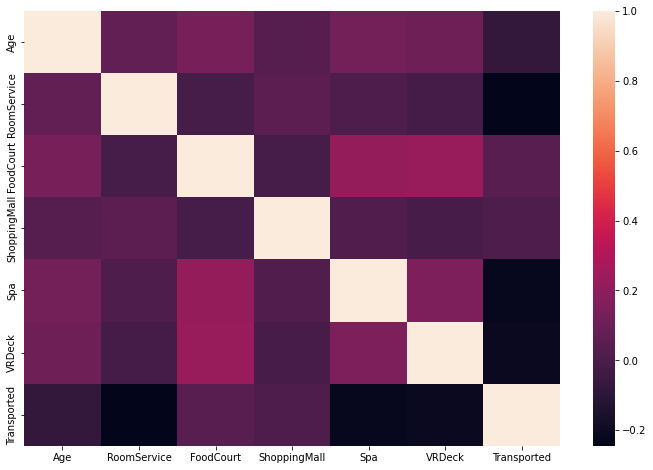

In [173]:
space_torr = train_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(space_torr)

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:black;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 20px;color:white;text-align:center"><b> Exploratory Data Analysis - Let's dig up each column out of the data and find out its story</b></p>
</div>

<div style="color:#162840;display:fill;width:160px;border-radius:10px;
            background-color:#73182a;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 20px;color:white;"><b>Home Planet</b></p>
</div>



In [174]:
HomePlanet = train_df.HomePlanet

In [175]:
print(f'{round(HomePlanet.isnull().sum() / len(HomePlanet) * 100 , 2)}% data is missing or {HomePlanet.isnull().sum()} values out of {len(HomePlanet)}')

2.31% data is missing or 201 values out of 8693


#### 2.31% data is missing or 201 values out of 8693

In [176]:
HomePlanet.describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

In [177]:
HomePlanet.value_counts().index

Index(['Earth', 'Europa', 'Mars'], dtype='object')

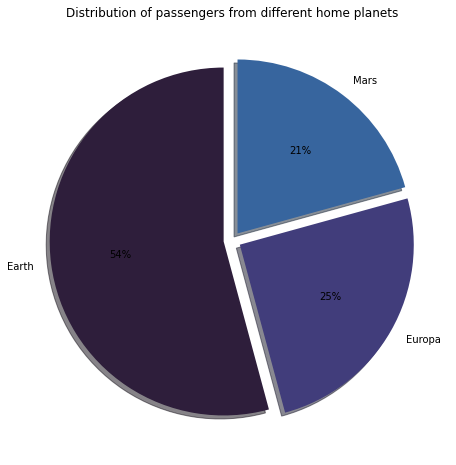

In [178]:
draw_pie(values=HomePlanet.value_counts().values,
         labels=HomePlanet.value_counts().index,
         explode=0.05,
         color_palette='mako',
         title='Distribution of passengers from different home planets')

Text(0, 0.5, 'Room service expenditure')

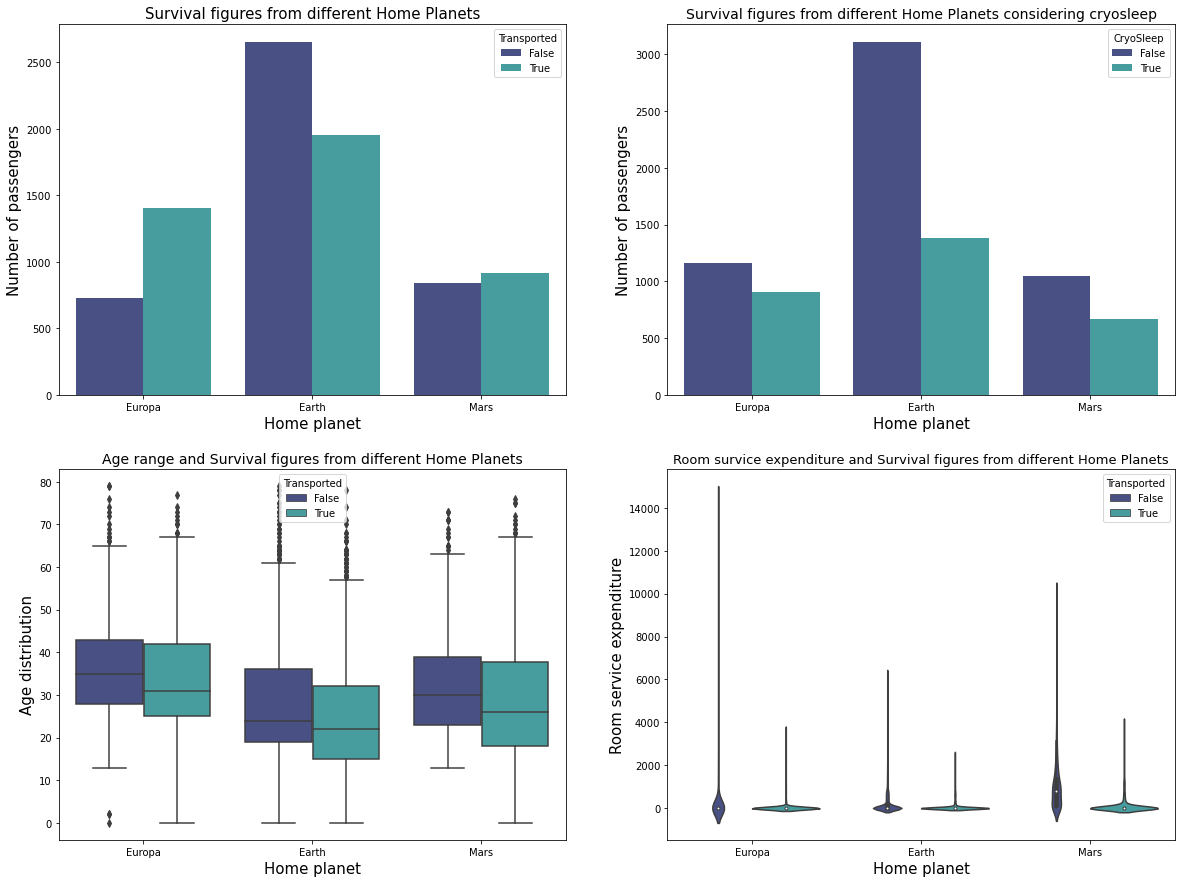

In [179]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(x = HomePlanet, hue = train_df.Transported, palette="mako")
plt.title('Survival figures from different Home Planets', fontsize=15)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)
# 


plt.subplot(2,2,2)
sns.countplot(x = HomePlanet, hue = train_df.CryoSleep, palette="mako")
plt.title('Survival figures from different Home Planets considering cryosleep', fontsize=14)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)
# 


plt.subplot(2,2,3)
sns.boxplot(x = HomePlanet, y = train_df.Age, hue = train_df.Transported,  palette="mako")
plt.title('Age range and Survival figures from different Home Planets', fontsize=14)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Age distribution', fontsize=15)
# 


plt.subplot(2,2,4)
sns.violinplot(x = HomePlanet, y = train_df.RoomService, hue= train_df.Transported, palette='mako')
plt.title('Room survice expenditure and Survival figures from different Home Planets', fontsize=13)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Room service expenditure', fontsize=15)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* Among the people in space, most of the people who survived and also who died are from Earth. But safest, departure seems to be the earth.
* Majority of people who were in cryosleep survived in contrast to the people who were not.
* Looks like Age is similarly distributed between different homeplanets and people who got transported.
* Looks like people from Europa had a wonderful time and loves the hotel room service.

Text(0, 0.5, 'Spa expenditure')

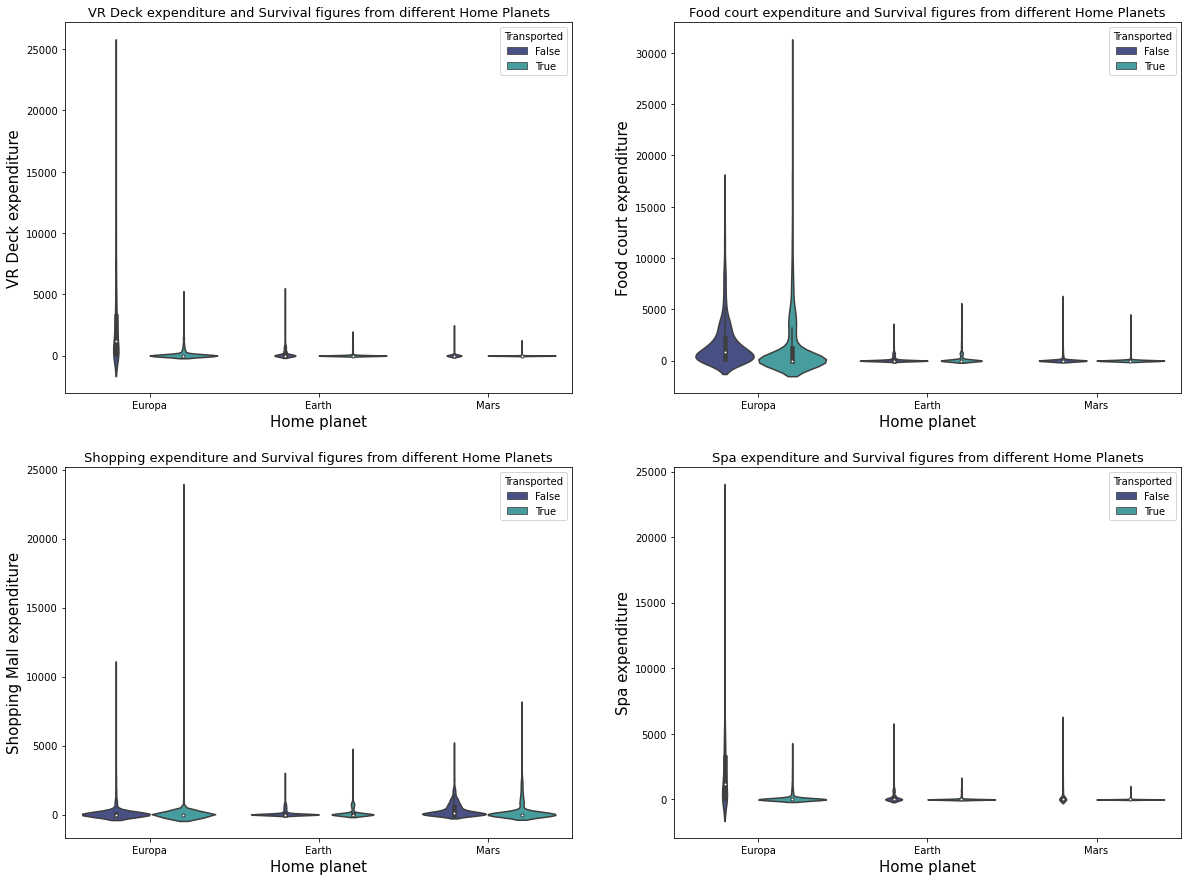

In [180]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.violinplot(x = HomePlanet, y = train_df.VRDeck, hue= train_df.Transported, palette='mako')
plt.title('VR Deck expenditure and Survival figures from different Home Planets', fontsize=13)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('VR Deck expenditure', fontsize=15)
#  


plt.subplot(2,2,2)
sns.violinplot(x = HomePlanet, y = train_df.FoodCourt, hue= train_df.Transported, palette='mako')
plt.title('Food court expenditure and Survival figures from different Home Planets', fontsize=13)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Food court expenditure', fontsize=15)
# 


plt.subplot(2,2,3)
sns.violinplot(x = HomePlanet, y = train_df.ShoppingMall, hue= train_df.Transported, palette='mako')
plt.title('Shopping expenditure and Survival figures from different Home Planets', fontsize=13)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Shopping Mall expenditure', fontsize=15)
# 


plt.subplot(2,2,4)
sns.violinplot(x = HomePlanet, y = train_df.Spa, hue= train_df.Transported, palette='mako')
plt.title('Spa expenditure and Survival figures from different Home Planets', fontsize=13)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Spa expenditure', fontsize=15)
# 

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* People from Europa spent the most in VR Deck, enjoying and actually enjoying a virtual world.
* So, the plot suggests that, people from Europa had more propensity to spend on Food court. 
* People from Mars should have spent more time in shopping mall and people from Europa may have spent a little more time in shopping mall.
* There's not much pattern in spa spending and survival figures.

<div style="color:#162840;display:fill;width:140px;border-radius:10px;
            background-color:#73182a;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 20px;color:white;"><b>Cryosleep</b></p>
</div>

#### Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

In [181]:
Cryosleep = train_df.CryoSleep

In [182]:
round(Cryosleep.isnull().sum()/len(Cryosleep)*100,2)

2.5

#### 2.5% data is missing or 217 values out of 8693

In [183]:
Cryosleep.describe()

count      8476
unique        2
top       False
freq       5439
Name: CryoSleep, dtype: object

In [184]:
Cryosleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

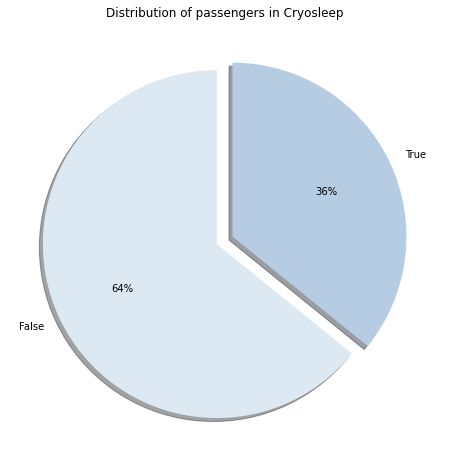

In [185]:
draw_pie(values=Cryosleep.value_counts().values,
        labels=Cryosleep.value_counts().index, explode=0.05, color_palette='BuPu',
        title='Distribution of passengers in Cryosleep')

In [186]:
train_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

Text(0, 0.5, 'Room service expenditure')

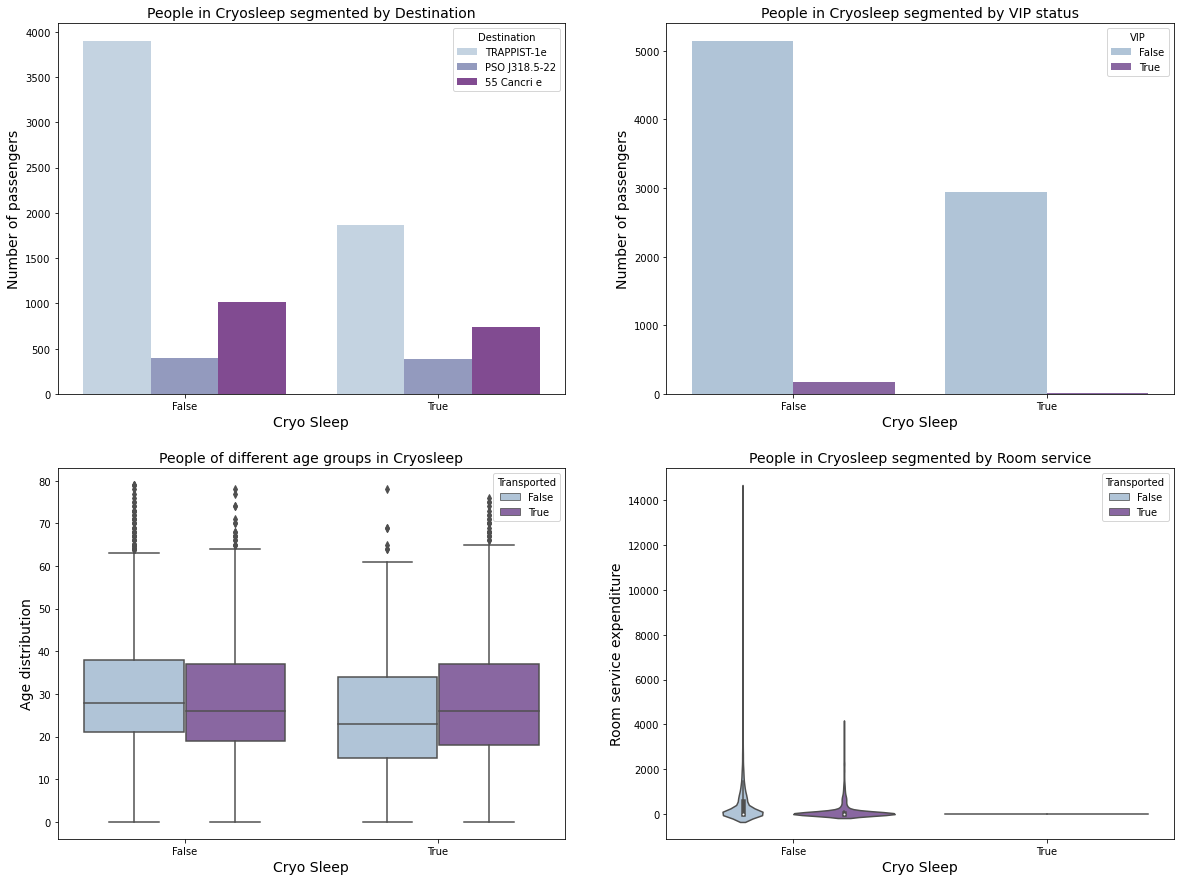

In [187]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.countplot(x = Cryosleep, hue= train_df.Destination, palette='BuPu')
plt.title('People in Cryosleep segmented by Destination', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Number of passengers', fontsize=14)
# 


plt.subplot(2,2,2)
sns.countplot(x=Cryosleep, hue=train_df.VIP, palette= 'BuPu')
plt.title('People in Cryosleep segmented by VIP status', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Number of passengers', fontsize=14)
# 


plt.subplot(2,2,3)
sns.boxplot(x=Cryosleep, y = train_df.Age,hue=train_df.Transported, palette= 'BuPu')
plt.title('People of different age groups in Cryosleep', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Age distribution', fontsize=14)
# 


plt.subplot(2,2,4)
sns.violinplot(x=Cryosleep, y = train_df.RoomService,hue=train_df.Transported, palette= 'BuPu').set(title='People in Cryosleep and room service expenditure')
plt.title('People in Cryosleep segmented by Room service', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Room service expenditure', fontsize=14)
# 

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* Majority of people who were not in cryosleep are heading towards TRAPPIST-1e station.
* Number of people with VIP status is very less.
* There is no considerable differences between the age distribution of people in cryosleep.
* Expenditure on room service is highly skewed.

Text(0, 0.5, 'Spa expenditure')

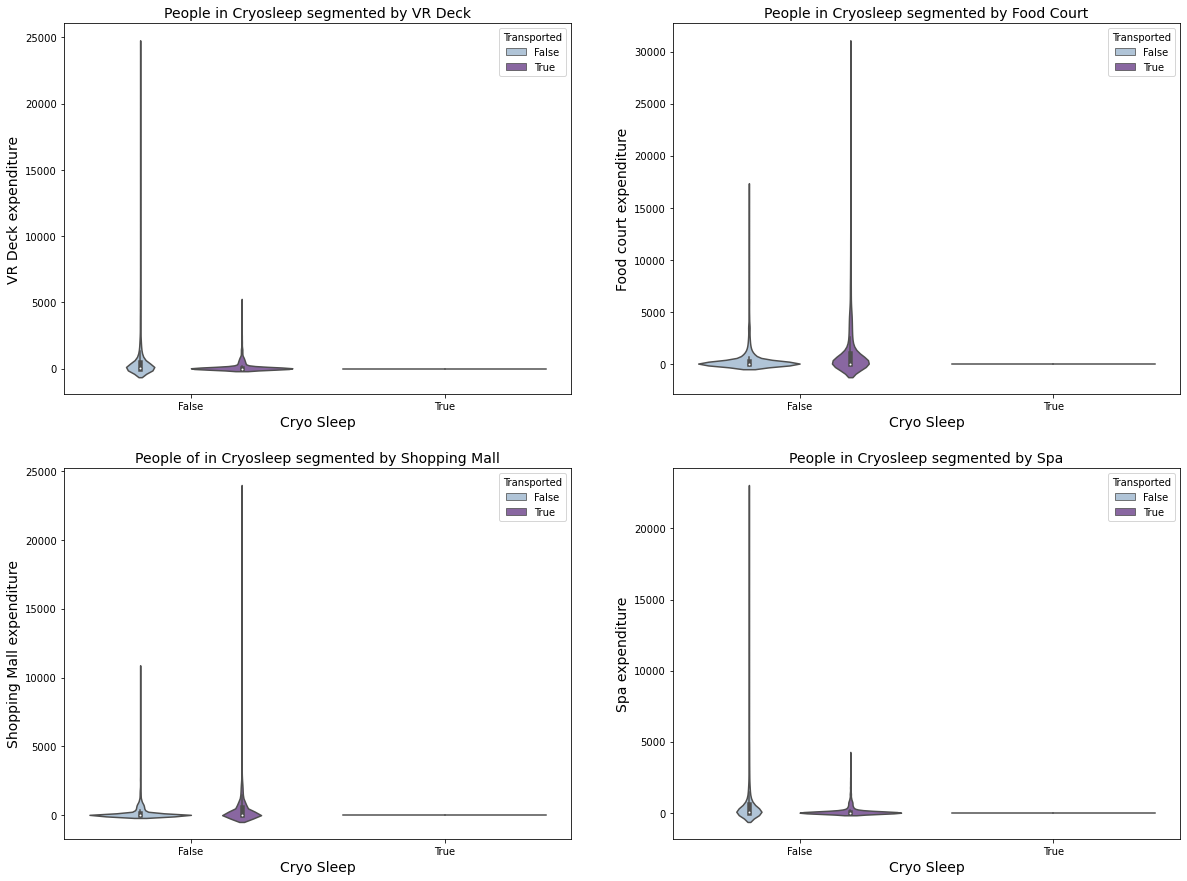

In [188]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.violinplot(x = Cryosleep, y= train_df.VRDeck, hue= train_df.Transported, palette='BuPu')
plt.title('People in Cryosleep segmented by VR Deck', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('VR Deck expenditure', fontsize=14)
#


plt.subplot(2,2,2)
sns.violinplot(x = Cryosleep, y= train_df.FoodCourt, hue= train_df.Transported, palette='BuPu')
plt.title('People in Cryosleep segmented by Food Court', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Food court expenditure', fontsize=14)
#


plt.subplot(2,2,3)
sns.violinplot(x=Cryosleep, y = train_df.ShoppingMall,hue=train_df.Transported, palette= 'BuPu')
plt.title('People of in Cryosleep segmented by Shopping Mall', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Shopping Mall expenditure', fontsize=14)
#


plt.subplot(2,2,4)
sns.violinplot(x=Cryosleep, y = train_df.Spa,hue=train_df.Transported, palette= 'BuPu')
plt.title('People in Cryosleep segmented by Spa', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Spa expenditure', fontsize=14)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* Very few people who were not in cryosleep had expenditure on VR Deck and neglegible from people who are in cryosleep which was expected. 
* Very few people who were not in cryosleep had expenditure at Food court and same pattern for people in cryosleep as above.
* Very few people who were not in cryosleep had expenditure at Shopping Mall and same pattern for people in cryosleep as above.
* In short, looks like the spaceship didn't have an appealing hospitality sector.

##### As expected, people who are in cryosleep are confined to their cabin and are not involved in liesure activities 

<div style="color:#162840;display:fill;width:100px;border-radius:10px;
            background-color:#73182a;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 20px;color:white;"><b>Cabin</b></p>
</div>

#### The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [189]:
Cabin = train_df.Cabin

In [190]:
print(f'{round(Cabin.isnull().sum()/len(Cabin)*100,2)}% data is missing or {Cabin.isnull().sum()} values out of {len(Cabin)}')

2.29% data is missing or 199 values out of 8693


#### 2.29% data is missing or 199 values out of 8693

In [191]:
Cabin.describe() 
# There are a lot of different cabins in the spaceship and it is of type object 

count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object

In [192]:
# Let's break up the cabin into different segments to access more granular data and analyze it further. We can break it 
# up into three different segments such as cabin_deck, cabin_nume, cabin_side

train_df['cabin_deck'] = train_df.loc[:,'Cabin'].dropna().apply(lambda cabin: str(cabin).split('/')[0])
train_df['cabin_num'] = train_df.loc[:,'Cabin'].dropna().apply(lambda cabin: int(str(cabin).split('/')[1]))
train_df['cabin_side'] = train_df.loc[:,'Cabin'].dropna().apply(lambda cabin: str(cabin).split('/')[2])
test_df['cabin_deck'] = test_df.loc[:,'Cabin'].dropna().apply(lambda cabin: str(cabin).split('/')[0])
test_df['cabin_num'] = test_df.loc[:,'Cabin'].dropna().apply(lambda cabin: int(str(cabin).split('/')[1]))
test_df['cabin_side'] = test_df.loc[:,'Cabin'].dropna().apply(lambda cabin: str(cabin).split('/')[2])

In [193]:
# Now I think we can drop the cabin column and insert our new columns in that place
train_df.drop('Cabin',axis=1, inplace=True)
test_df.drop('Cabin',axis=1, inplace=True)

In [194]:
train_df.insert(3, 'cabin_Deck', train_df.cabin_deck)
train_df.insert(4, 'cabin_Num', train_df.cabin_num)
train_df.insert(5, 'cabin_Side', train_df.cabin_side)
train_df.drop(['cabin_num','cabin_deck','cabin_side'], axis=1, inplace=True)
test_df.insert(3, 'cabin_Deck', test_df.cabin_deck)
test_df.insert(4, 'cabin_Num', test_df.cabin_num)
test_df.insert(5, 'cabin_Side', test_df.cabin_side)
test_df.drop(['cabin_num','cabin_deck','cabin_side'], axis=1, inplace=True)

<div style="color:#162840;display:fill;width:160px;border-radius:10px;
            background-color:#73182a;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 20px;color:white;"><b>Cabin Decks</b></p>
</div>

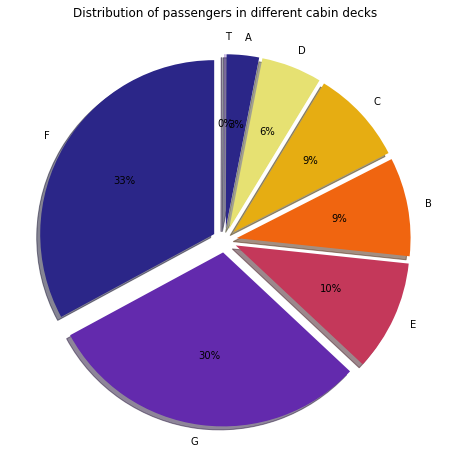

In [195]:
draw_pie(values=train_df.cabin_Deck.value_counts().values,
        labels=train_df.cabin_Deck.value_counts().index, explode=0.07, color_palette='CMRmap',
        title='Distribution of passengers in different cabin decks')

Text(0, 0.5, 'Number of passengers')

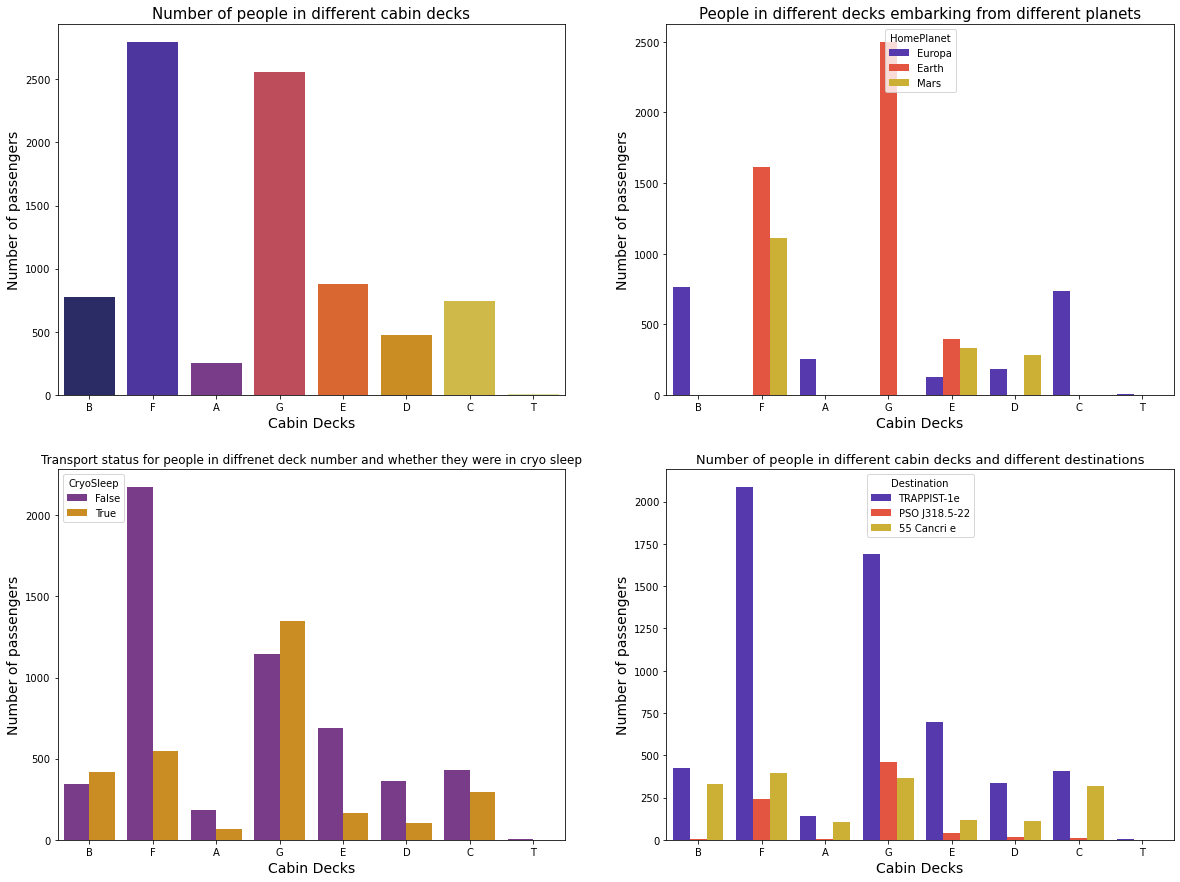

In [196]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.countplot(x=train_df.cabin_Deck, palette='CMRmap')
plt.title('Number of people in different cabin decks', fontsize=15)
plt.xlabel('Cabin Decks', fontsize=14)
plt.ylabel('Number of passengers', fontsize=14)
#


plt.subplot(2,2,2)
sns.countplot(x=train_df.cabin_Deck, hue=HomePlanet, palette='CMRmap')
plt.title('People in different decks embarking from different planets', fontsize=15)
plt.xlabel('Cabin Decks', fontsize=14)
plt.ylabel('Number of passengers', fontsize=14)
#


plt.subplot(2,2,3)
sns.countplot(x=train_df.cabin_Deck, hue=Cryosleep, palette='CMRmap').set(title='Transport status for people in diffrenet deck number and whether they were in cryo sleep')
plt.title('Transport status for people in diffrenet deck number and whether they were in cryo sleep', fontsize=12)
plt.xlabel('Cabin Decks', fontsize=14)
plt.ylabel('Number of passengers', fontsize=14)
#


plt.subplot(2,2,4)
sns.countplot(x=train_df.cabin_Deck, hue=train_df.Destination, palette='CMRmap').set(title='Number of people in different cabin decks and different destinations')
plt.title('Number of people in different cabin decks and different destinations', fontsize=13)
plt.xlabel('Cabin Decks', fontsize=14)
plt.ylabel('Number of passengers', fontsize=14)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* Decks F and G have most of the passengers aboard the spaceship. 
* Deck F and G have the maximum number of people from planet Earth.
* Decks F didn't have much people in cryosleep whereas maximum people were in cryosleep in deck G.
* TRAPPIST-1e has the most people coming from Deck F and G and least from Deck A.

Text(0, 0.5, 'Room service expenditure')

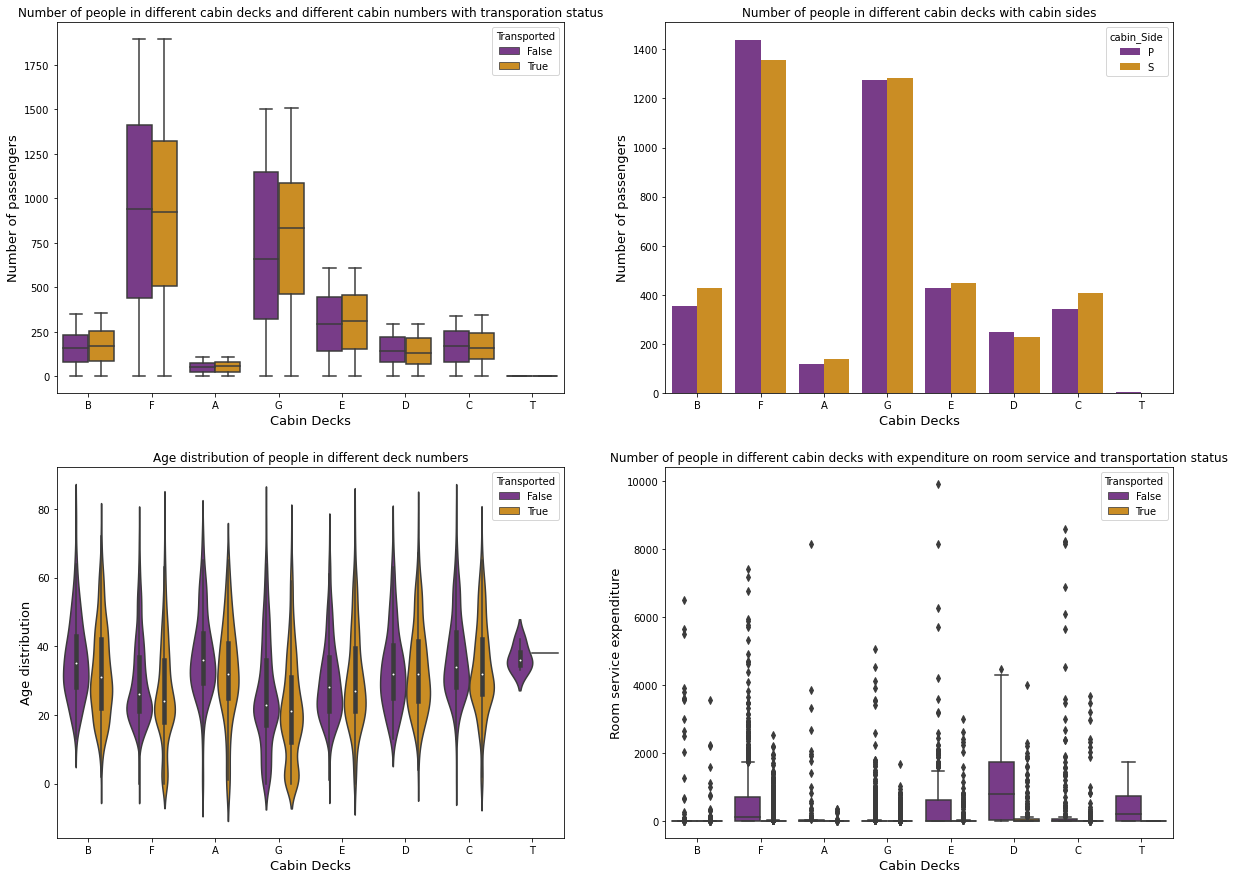

In [197]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(x=train_df.cabin_Deck, y = train_df.cabin_Num, hue= train_df.Transported, palette='CMRmap').set(title='Number of people in different cabin decks and different cabin numbers with transporation status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Number of passengers', fontsize =13)
#


plt.subplot(2,2,2)
sns.countplot(x=train_df.cabin_Deck, hue= train_df.cabin_Side, palette='CMRmap').set(title='Number of people in different cabin decks with cabin sides')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Number of passengers', fontsize =13)
#


plt.subplot(2,2,3)
sns.violinplot(x=train_df.cabin_Deck, y = train_df.Age, hue=train_df.Transported, palette='CMRmap').set(title='Age distribution of people in different deck numbers')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Age distribution', fontsize =13)
#


plt.subplot(2,2,4)
sns.boxplot(x=train_df.cabin_Deck, y = train_df.RoomService, hue=train_df.Transported, palette='CMRmap').set(title='Number of people in different cabin decks with expenditure on room service and transportation status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Room service expenditure', fontsize =13)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* Decks F and G have most of the passengers that have been transported to another dimension as expected.
* This plot is expected to be like this.
* Looks like age distribution of people in different decks is almost same.
* There are a lot of outliers in this plot.

Text(0, 0.5, 'Number of passengers')

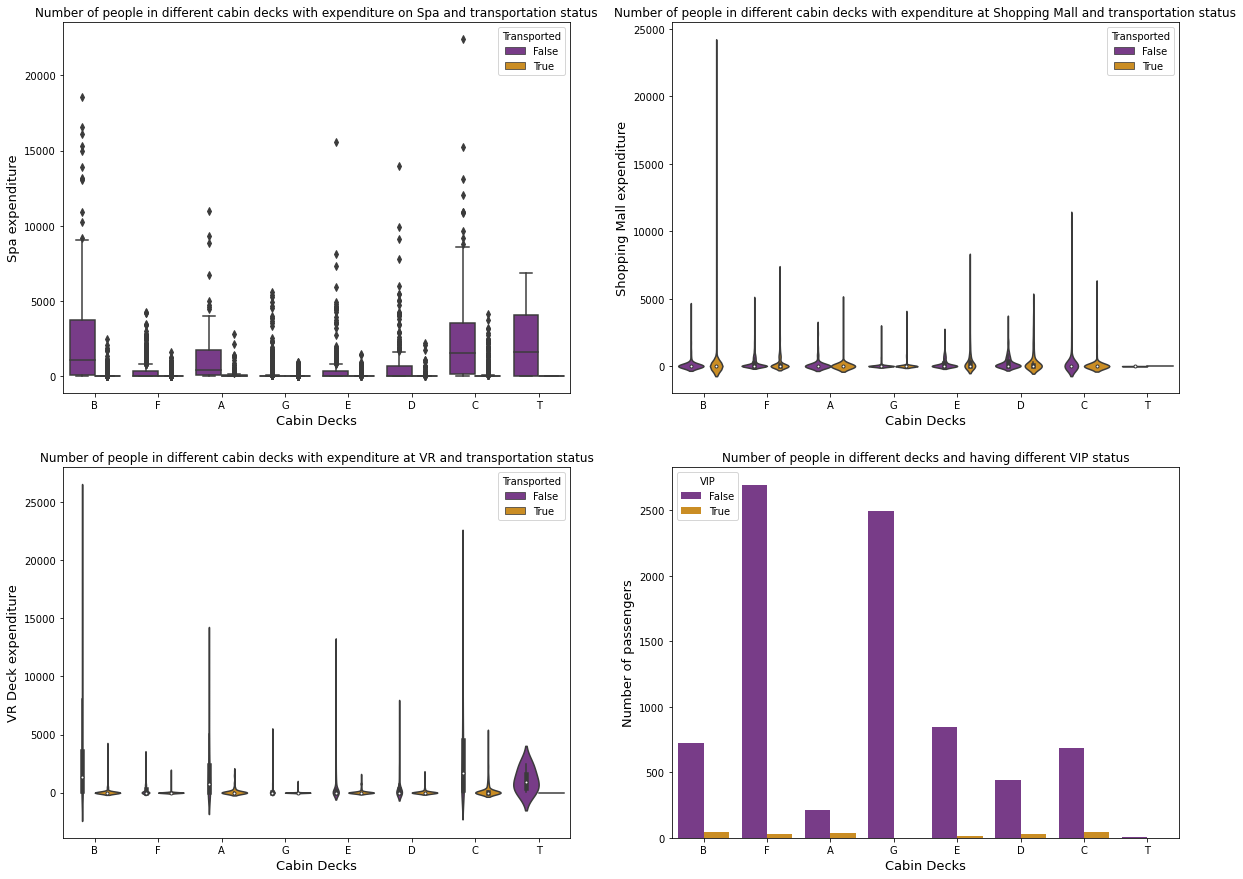

In [198]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(x=train_df.cabin_Deck, y = train_df.Spa, hue= train_df.Transported, palette='CMRmap').set(title='Number of people in different cabin decks with expenditure on Spa and transportation status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Spa expenditure', fontsize =13)
#


plt.subplot(2,2,2)
sns.violinplot(x=train_df.cabin_Deck, y = train_df.ShoppingMall, hue=train_df.Transported, palette='CMRmap').set(title = 'Number of people in different cabin decks with expenditure at Shopping Mall and transportation status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Shopping Mall expenditure', fontsize =13)
#


plt.subplot(2,2,3)
sns.violinplot(x=train_df.cabin_Deck, y = train_df.VRDeck, hue=train_df.Transported, palette='CMRmap').set(title = 'Number of people in different cabin decks with expenditure at VR and transportation status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('VR Deck expenditure', fontsize =13)
#


plt.subplot(2,2,4)
sns.countplot(x=train_df.cabin_Deck, hue=train_df.VIP, palette='CMRmap').set(title = 'Number of people in different decks and having different VIP status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Number of passengers', fontsize =13)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* Decks C and T have most of the passengers that have not been transported to another dimension and spent the most on spa. 
* People who did a lot of shopping were from Deck B and were transported also.
* People who got transported from Deck B and C spent the most on VR Deck.
* Almost all the passengers do not have VIP status but most of them are from Deck F and G.

<div style="color:#162840;display:fill;width:160px;border-radius:10px;
            background-color:#73182a;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 20px;color:white;"><b>Cabin Sides</b></p>
</div>

#### Either Port or Starboard side

In [199]:
round(train_df.cabin_Side.isnull().sum()/len(train_df.cabin_Side)*100,2)

2.29

### 2.29% data is missing or 199 values out of 8693

In [200]:
train_df.cabin_Side.value_counts()

S    4288
P    4206
Name: cabin_Side, dtype: int64

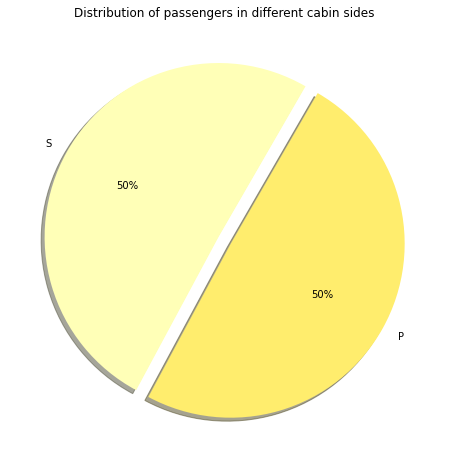

In [201]:
draw_pie(values=train_df.cabin_Side.value_counts().values,
        labels=train_df.cabin_Side.value_counts().index, explode=0.04, color_palette='afmhot_r',
        title='Distribution of passengers in different cabin sides', startangle=60)

Text(0, 0.5, 'Number of Passengers')

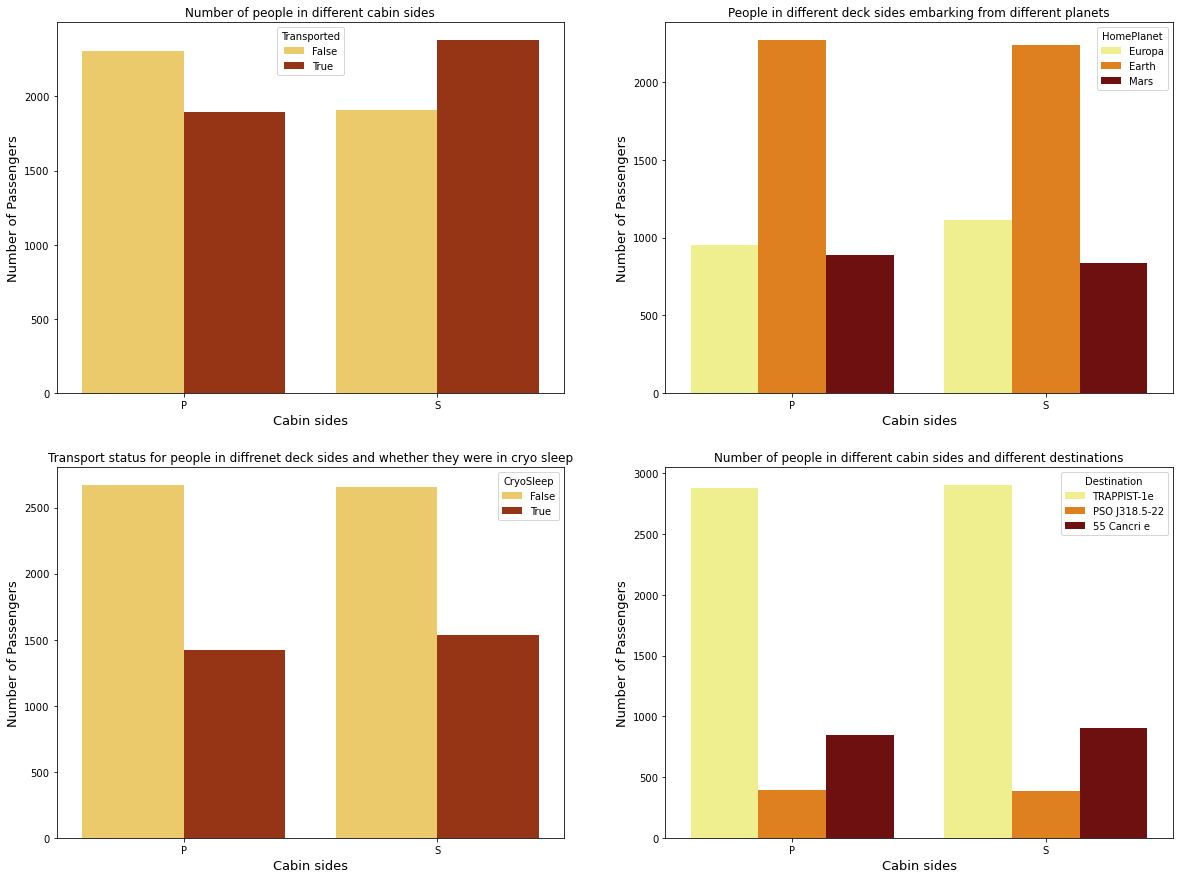

In [202]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.countplot(x=train_df.cabin_Side, hue = train_df.Transported, palette='afmhot_r').set(title='Number of people in different cabin sides')
plt.xlabel('Cabin sides', fontsize =13)
plt.ylabel('Number of Passengers', fontsize =13)
#


plt.subplot(2,2,2)
sns.countplot(x=train_df.cabin_Side, hue=HomePlanet, palette='afmhot_r').set(title='People in different deck sides embarking from different planets')
plt.xlabel('Cabin sides', fontsize =13)
plt.ylabel('Number of Passengers', fontsize =13)
#


plt.subplot(2,2,3)
sns.countplot(x=train_df.cabin_Side, hue=Cryosleep, palette='afmhot_r').set(title='Transport status for people in diffrenet deck sides and whether they were in cryo sleep')
plt.xlabel('Cabin sides', fontsize =13)
plt.ylabel('Number of Passengers', fontsize =13)
#


plt.subplot(2,2,4)
sns.countplot(x=train_df.cabin_Side, hue=train_df.Destination, palette='afmhot_r').set(title='Number of people in different cabin sides and different destinations')
plt.xlabel('Cabin sides', fontsize =13)
plt.ylabel('Number of Passengers', fontsize =13)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* Port side and starboard side have almost the same number of passengers. 
* Most of the passengers are from planet Earth in both sides.
* Port side and starboard side have almost the same number of passengers in cryosleep and without it.
* Most of the passengers are going to TRAPPIST-1e present in both sides.

Text(0, 0.5, 'Room Service expenditure')

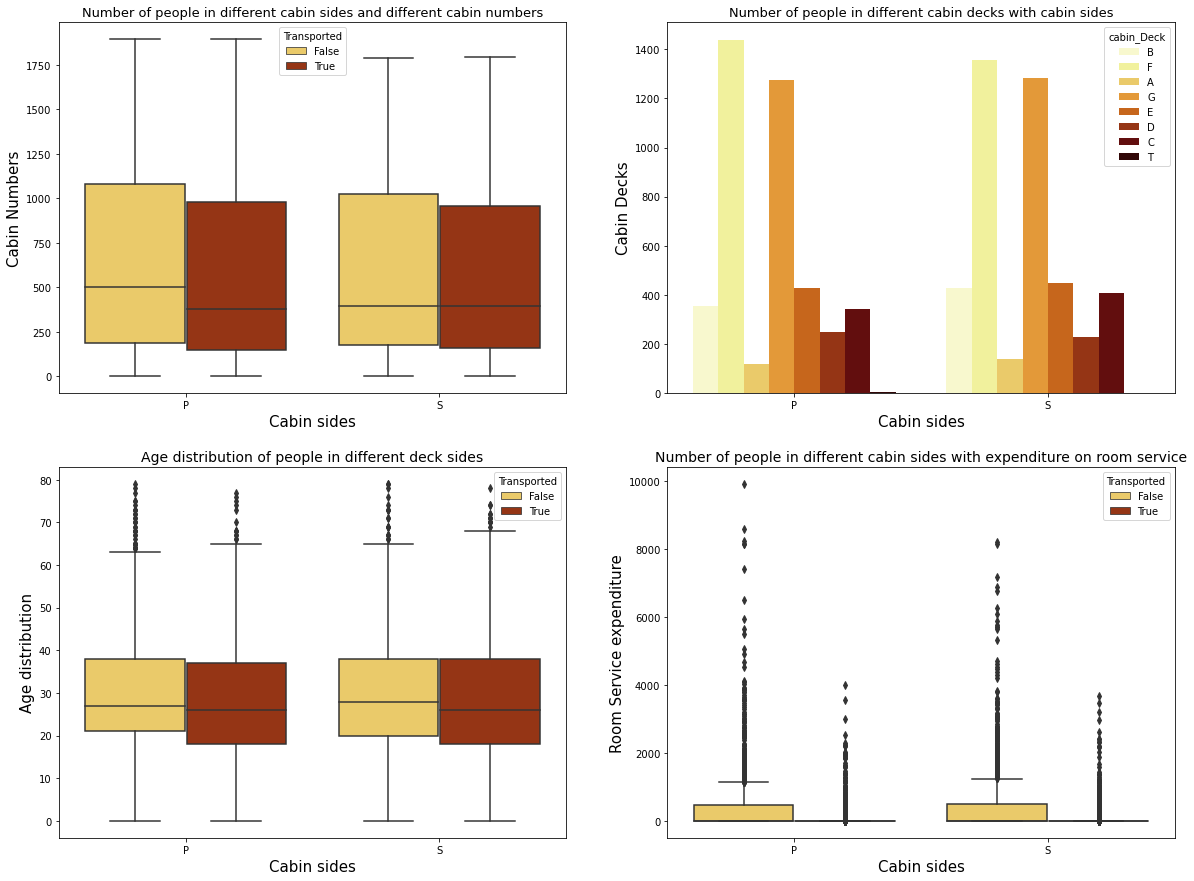

In [203]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(x=train_df.cabin_Side, y = train_df.cabin_Num, hue= train_df.Transported, palette='afmhot_r')
plt.title('Number of people in different cabin sides and different cabin numbers', fontsize =13)
plt.xlabel('Cabin sides', fontsize =15)
plt.ylabel('Cabin Numbers', fontsize =15)
#


plt.subplot(2,2,2)
sns.countplot(x=train_df.cabin_Side, hue= train_df.cabin_Deck, palette='afmhot_r')
plt.title('Number of people in different cabin decks with cabin sides', fontsize =13)
plt.xlabel('Cabin sides', fontsize =15)
plt.ylabel('Cabin Decks', fontsize =15)
#


plt.subplot(2,2,3)
sns.boxplot(x=train_df.cabin_Side, y = train_df.Age, hue=train_df.Transported, palette='afmhot_r')
plt.title('Age distribution of people in different deck sides', fontsize =14)
plt.xlabel('Cabin sides', fontsize =15)
plt.ylabel('Age distribution', fontsize =15)
#


plt.subplot(2,2,4)
sns.boxplot(x=train_df.cabin_Side, y = train_df.RoomService, hue=train_df.Transported, palette='afmhot_r')
plt.title('Number of people in different cabin sides with expenditure on room service', fontsize =14)
plt.xlabel('Cabin sides', fontsize =15)
plt.ylabel('Room Service expenditure', fontsize =15)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* We have almost same passengers from both cabins that are both transported or not. 
* Decks F and G have maximum number of passengers in both ports.
* Age distribution of passengers is similar in both ports and there are outliers also.
* There is a huge amount of outlier activity in both ports when considering room service expenditure.

Text(0, 0.5, 'VIP Status')

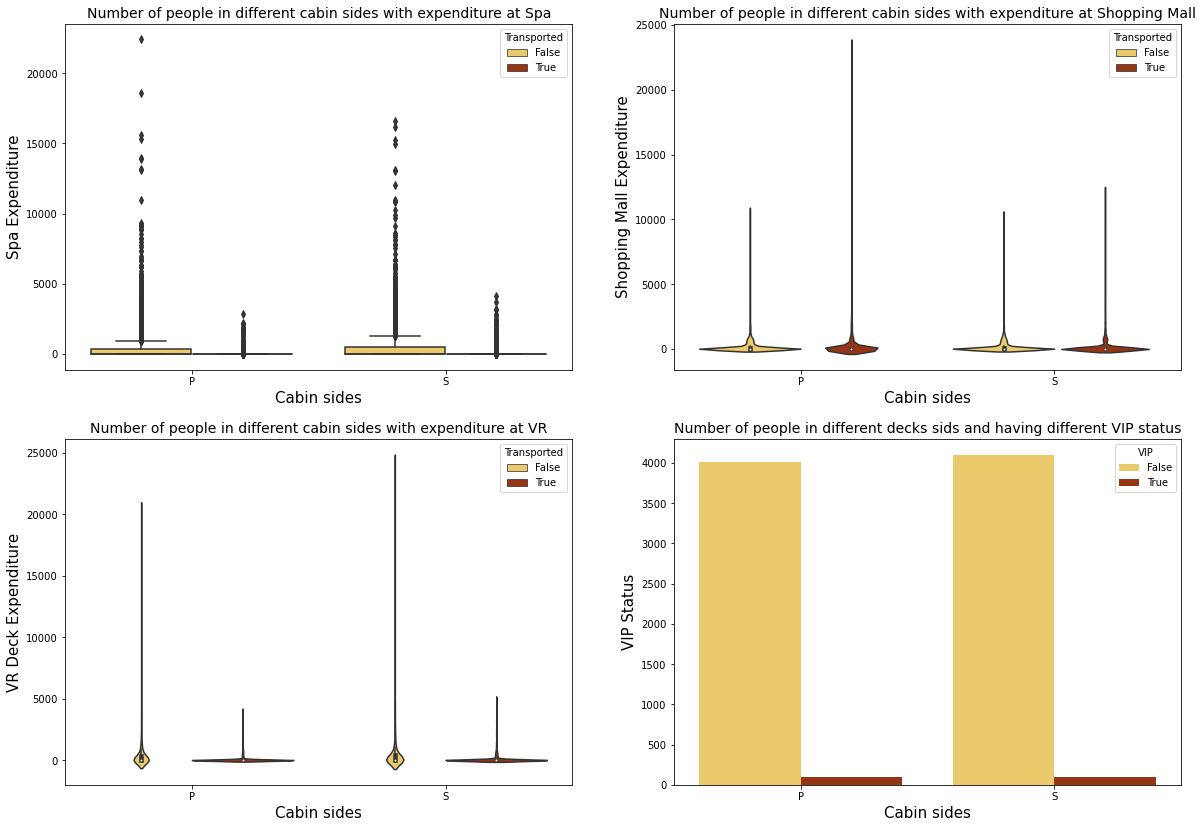

In [204]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
sns.boxplot(x=train_df.cabin_Side, y = train_df.Spa, hue= train_df.Transported, palette='afmhot_r')
plt.title('Number of people in different cabin sides with expenditure at Spa', fontsize =14)
plt.xlabel('Cabin sides', fontsize=15)
plt.ylabel('Spa Expenditure', fontsize=15)
#


plt.subplot(2,2,2)
sns.violinplot(x=train_df.cabin_Side, y = train_df.ShoppingMall, hue=train_df.Transported, palette='afmhot_r')
plt.title('Number of people in different cabin sides with expenditure at Shopping Mall', fontsize =14)
plt.xlabel('Cabin sides', fontsize=15)
plt.ylabel('Shopping Mall Expenditure', fontsize=15)
#


plt.subplot(2,2,3)
sns.violinplot(x=train_df.cabin_Side, y = train_df.VRDeck, hue=train_df.Transported, palette='afmhot_r')
plt.title('Number of people in different cabin sides with expenditure at VR', fontsize =14)
plt.xlabel('Cabin sides', fontsize=15)
plt.ylabel('VR Deck Expenditure', fontsize=15)
#


plt.subplot(2,2,4)
sns.countplot(x=train_df.cabin_Side, hue=train_df.VIP, palette='afmhot_r')
plt.title('Number of people in different decks sids and having different VIP status', fontsize =14)
plt.xlabel('Cabin sides', fontsize=15)
plt.ylabel('VIP Status', fontsize=15)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* There is a huge amount of outlier activity in both ports when considering Spa expenditure. 
* People from port side spent the most in shopping mall who were also transported.
* People from starboard side spent the most in VR Deck who were also not transported.
* There is similar activity for passengers who have VIP status having maximum people with no VIP status.

<div style="color:#162840;display:fill;width:180px;border-radius:10px;
            background-color:#73182a;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 20px;color:white;"><b>Cabin Number</b></p>
</div>

### Cabin numbers extracted from cabin feature

In [205]:
round(train_df.cabin_Num.isnull().sum()/len(train_df.cabin_Num)*100,2)

2.29

### 2.29% data is missing or 199 values out of 8693

In [206]:
train_df.cabin_Num.value_counts()

82.0      28
86.0      22
19.0      22
56.0      21
176.0     21
          ..
1644.0     1
1515.0     1
1639.0     1
1277.0     1
1894.0     1
Name: cabin_Num, Length: 1817, dtype: int64

Text(0, 0.5, 'Passenger count')

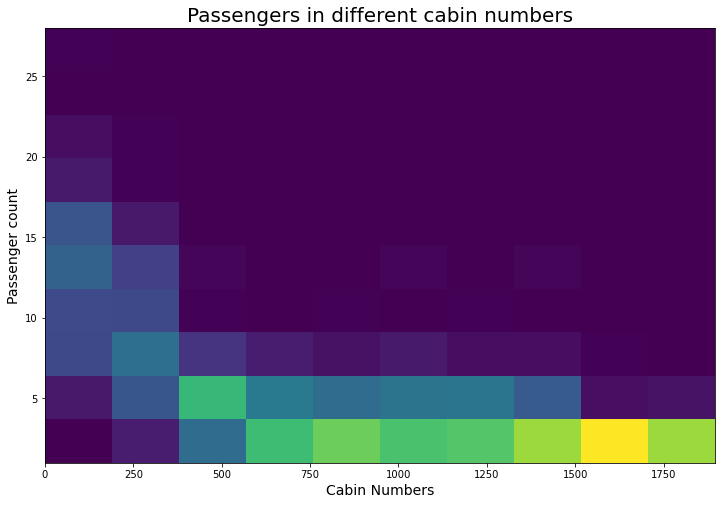

In [207]:
plt.figure(figsize=(12,8))
plt.hist2d(x = train_df.cabin_Num.value_counts().index.map(int), y = train_df.cabin_Num.value_counts().values)
plt.title('Passengers in different cabin numbers', fontsize = 20)
plt.xlabel('Cabin Numbers', fontsize = 14)
plt.ylabel('Passenger count', fontsize=14)

# As we see most of the passengers resided in deck numbers ranging from 50 to 500

In [208]:
train_df[(train_df.cabin_Num > 0) & (train_df.cabin_Num < 800)]['cabin_Deck']

4       F
6       F
8       F
9       B
10      B
       ..
8686    A
8687    A
8688    A
8691    E
8692    E
Name: cabin_Deck, Length: 5677, dtype: object

Text(0, 0.5, 'Cabin Numbers')

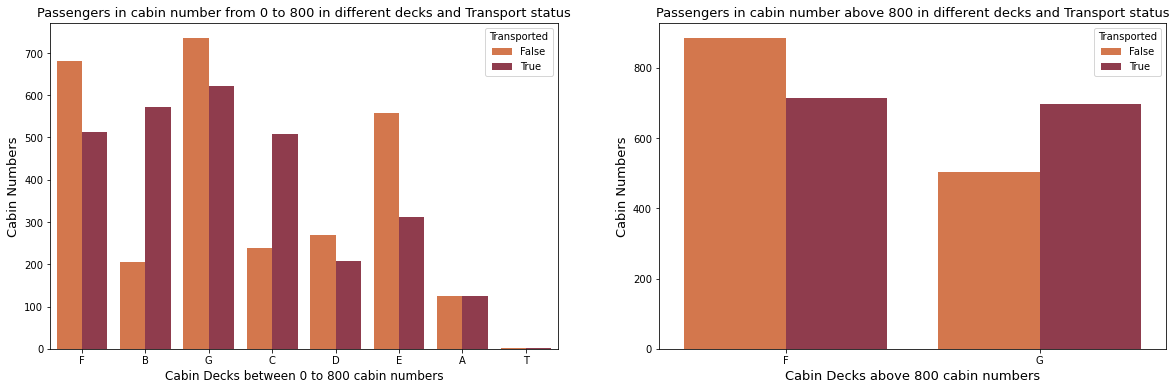

In [209]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x=train_df[(train_df.cabin_Num > 0) & (train_df.cabin_Num < 800)]['cabin_Deck'], hue=train_df.Transported, palette=sns.color_palette('icefire_r'))
plt.xlabel('Cabin Decks between 0 to 800 cabin numbers', fontsize=12)
plt.ylabel('Cabin Numbers', fontsize=13)
plt.title('Passengers in cabin number from 0 to 800 in different decks and Transport status', fontsize=13)

plt.subplot(1,2,2)
sns.countplot(x=train_df[train_df.cabin_Num > 800]['cabin_Deck'], hue=train_df.Transported,palette=sns.color_palette('icefire_r'))
plt.title('Passengers in cabin number above 800 in different decks and Transport status', fontsize=13)
plt.xlabel('Cabin Decks above 800 cabin numbers', fontsize=13)
plt.ylabel('Cabin Numbers', fontsize=13)

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* Passengers having deck numbers below 800 have uneven distribution having most people in Deck G who did not get transported and least number of passengers in Deck A. 
* Passengers having deck number above 800 are only in Deck F and G and have similar distribution.

Text(0, 0.5, 'Number of passengers')

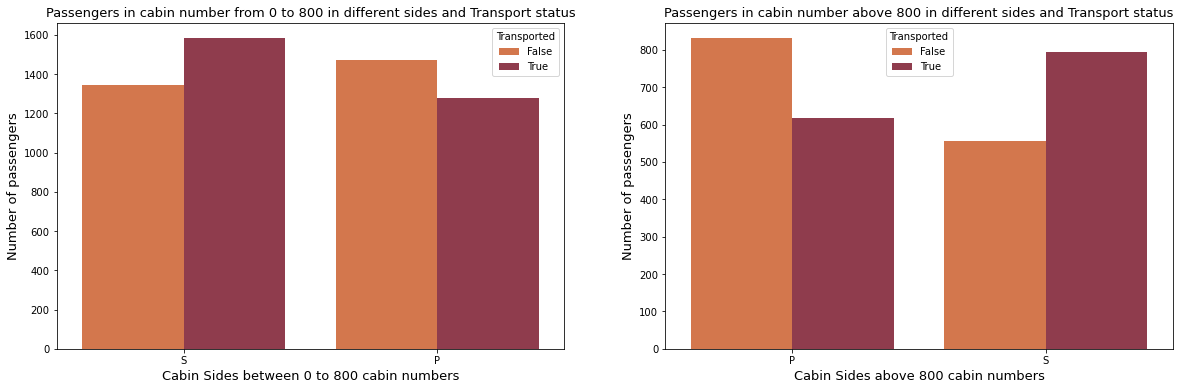

In [210]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x=train_df[(train_df.cabin_Num > 0) & (train_df.cabin_Num < 800)]['cabin_Side'], hue=train_df.Transported, palette=sns.color_palette('icefire_r'))
plt.xlabel('Cabin Sides between 0 to 800 cabin numbers', fontsize=13)
plt.title('Passengers in cabin number from 0 to 800 in different sides and Transport status', fontsize=13)
plt.ylabel('Number of passengers', fontsize=13)


plt.subplot(1,2,2)
sns.countplot(x=train_df[train_df.cabin_Num > 800]['cabin_Side'], hue=train_df.Transported,palette=sns.color_palette('icefire_r'))
plt.title('Passengers in cabin number above 800 in different sides and Transport status', fontsize=13)
plt.xlabel('Cabin Sides above 800 cabin numbers', fontsize=13)
plt.ylabel('Number of passengers', fontsize=13)

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* Passengers having cabin numbers below 800 have similar distribution of number of passengers displaying transportation status having most people transported from Port side. 
* Passengers having cabin numbers above 800 have similar distribution of number of passengers displaying transportation status having most people transported from Starboard side.

Text(0, 0.5, 'Number of Passengers')

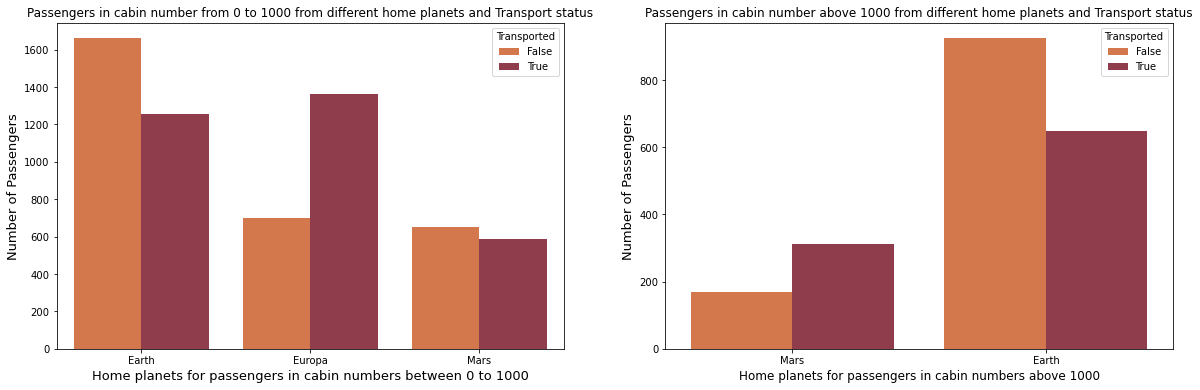

In [211]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x=train_df[(train_df.cabin_Num > 0) & (train_df.cabin_Num < 1000)]['HomePlanet'], hue=train_df.Transported, palette=sns.color_palette('icefire_r'))
plt.xlabel('Home planets for passengers in cabin numbers between 0 to 1000', fontsize=13)
plt.ylabel('Number of Passengers', fontsize=13)

plt.title('Passengers in cabin number from 0 to 1000 from different home planets and Transport status', fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x=train_df[train_df.cabin_Num > 1000]['HomePlanet'], hue=train_df.Transported,palette=sns.color_palette('icefire_r'))
plt.title('Passengers in cabin number above 1000 from different home planets and Transport status', fontsize=12)
plt.xlabel('Home planets for passengers in cabin numbers above 1000', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=13)

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* Passengers having cabin numbers below 1000 have have the most people from planet Earth who were not transported and people from Europa who were the most transported.
* There are no passengers from Europa above cabin number 1000 and least number of people who were transported were from Mars and max from Earth

<div style="color:#162840;display:fill;width:150px;border-radius:10px;
            background-color:#73182a;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 20px;color:white;"><b>Destination</b></p>
</div>

### The planet the passenger will be debark


In [212]:
destination = train_df.Destination

In [213]:
print(f'{round(destination.isnull().sum()/len(destination)*100,2)}% data is missing or {destination.isnull().sum()} values out of {len(destination)}')

2.09% data is missing or 182 values out of 8693


### 2.09% data is missing or 182 values out of 8693

In [214]:
destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

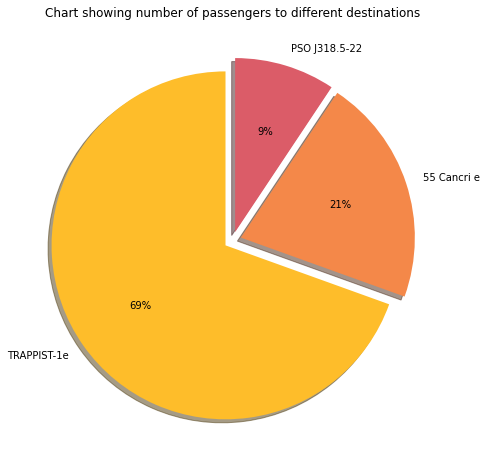

In [215]:
draw_pie(values=destination.value_counts().values,
        labels=destination.value_counts().index,
        explode=0.05, color_palette='plasma_r',
        title='Chart showing number of passengers to different destinations')

In [216]:
train_df.head()

PassengerId HomePlanet CryoSleep cabin_Deck  cabin_Num cabin_Side  \
0     0001_01     Europa     False          B        0.0          P   
1     0002_01      Earth     False          F        0.0          S   
2     0003_01     Europa     False          A        0.0          S   
3     0003_02     Europa     False          A        0.0          S   
4     0004_01      Earth     False          F        1.0          S   

   Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0  TRAPPIST-1e  39.0  False          0.0        0.0           0.0     0.0   
1  TRAPPIST-1e  24.0  False        109.0        9.0          25.0   549.0   
2  TRAPPIST-1e  58.0   True         43.0     3576.0           0.0  6715.0   
3  TRAPPIST-1e  33.0  False          0.0     1283.0         371.0  3329.0   
4  TRAPPIST-1e  16.0  False        303.0       70.0         151.0   565.0   

   VRDeck               Name  Transported  
0     0.0    Maham Ofracculy        False  
1    44.0       Juanna Vines         True  
2    49.0      Altark Susent        False  
3   193.0       Solam Susent        False  
4     2.0  Willy Santantines         True

Text(0, 0.5, 'Expenditure on Room Service')

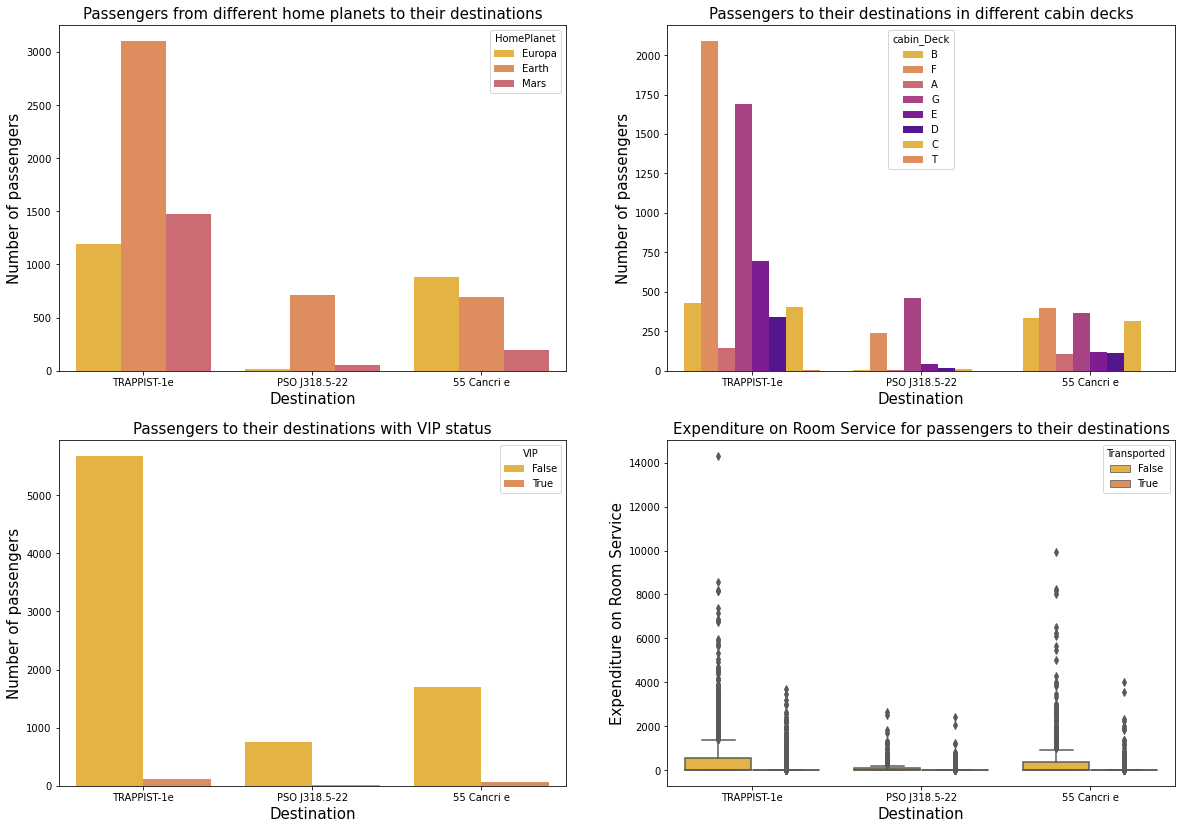

In [217]:
plt.figure(figsize=(20,14))

color = sns.color_palette('plasma_r')
plt.subplot(2,2,1)
sns.countplot(destination, hue=HomePlanet, palette=color)
plt.title('Passengers from different home planets to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)
#


plt.subplot(2,2,2)
sns.countplot(destination, hue=train_df.cabin_Deck, palette = color)
plt.title('Passengers to their destinations in different cabin decks', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)
#


plt.subplot(2,2,3)
sns.countplot(destination, hue=train_df.VIP ,palette = color)
plt.title('Passengers to their destinations with VIP status', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)
#


plt.subplot(2,2,4)
sns.boxplot(x = destination, y=train_df.RoomService ,hue = train_df.Transported, palette = color)
plt.title('Expenditure on Room Service for passengers to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Expenditure on Room Service', fontsize=15)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* Most of the passengers are going to TRAPPIST-1e are from Earth. 
* Most of the passengers who are going to TRAPPIST-1e are in Deck F.
* Most of the people don't have VIP access who are going to TRAPPIST-1e.
* There is a lot of outlier activity having people spending the most who are going to TRAPPIST-1e

Text(0, 0.5, 'Age')

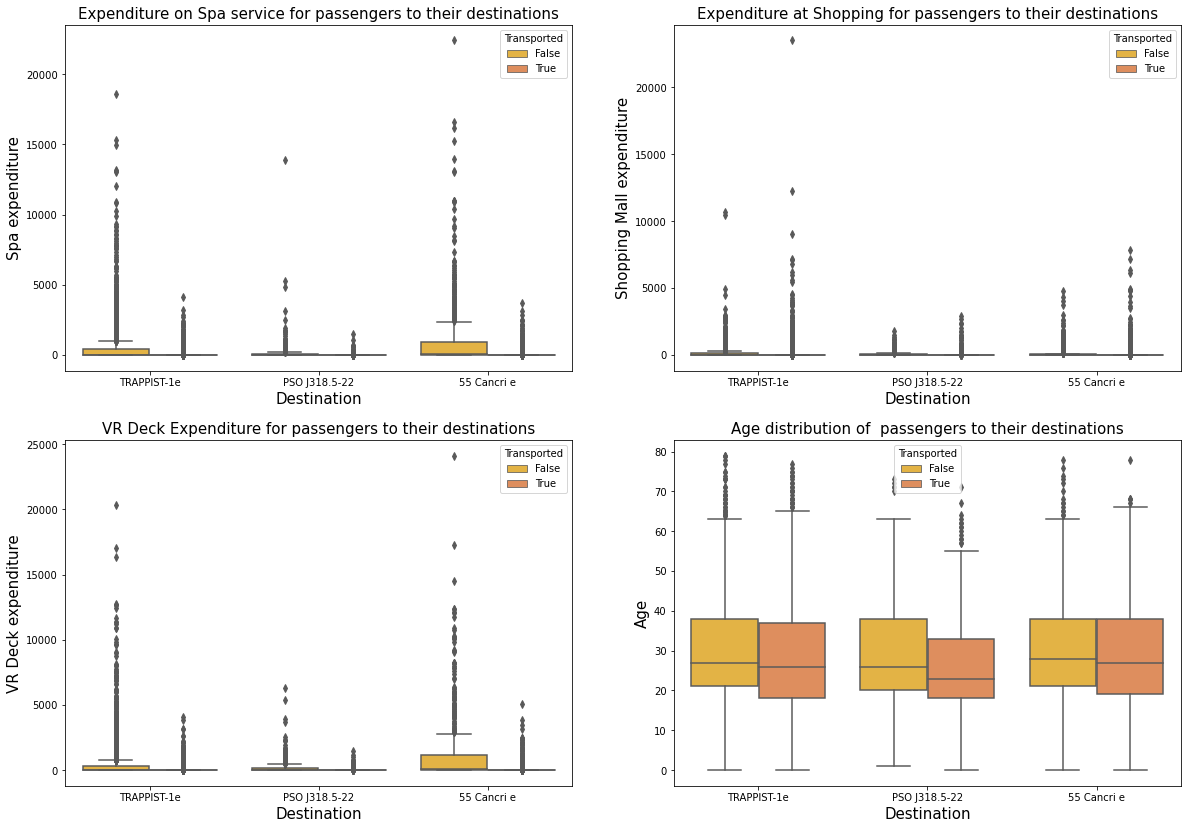

In [218]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
sns.boxplot(x = destination, y=train_df.Spa ,hue = train_df.Transported, palette = color)
plt.title('Expenditure on Spa service for passengers to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Spa expenditure', fontsize=15)
#


plt.subplot(2,2,2)
sns.boxplot(x = destination, y=train_df.ShoppingMall ,hue = train_df.Transported, palette = color)
plt.title('Expenditure at Shopping for passengers to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Shopping Mall expenditure', fontsize=15)
#


plt.subplot(2,2,3)
sns.boxplot(x = destination, y=train_df.VRDeck ,hue = train_df.Transported, palette = color)
plt.title('VR Deck Expenditure for passengers to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('VR Deck expenditure', fontsize=15)
#


plt.subplot(2,2,4)
sns.boxplot(x = destination, y=train_df.Age ,hue = train_df.Transported, palette = color)
plt.title('Age distribution of  passengers to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Age', fontsize=15)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* A lot of outlier activity in ever case because the expenditure section is highly skewed and age distribution of passengers is almost similar for every destination.

<div style="color:#162840;display:fill;width:80px;border-radius:10px;
            background-color:#73182a;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 20px;color:white;"><b>Age</b></p>
</div>

### The age of the passenger.

In [219]:
age = train_df.Age

In [220]:
print(f'{round(age.isnull().sum()/len(age)*100,2)}% data is missing or {age.isnull().sum()} values out of {len(age)}')

2.06% data is missing or 179 values out of 8693


### 2.06% data is missing or 179 values out of 8693

Text(0, 0.5, 'Number of Passengers')

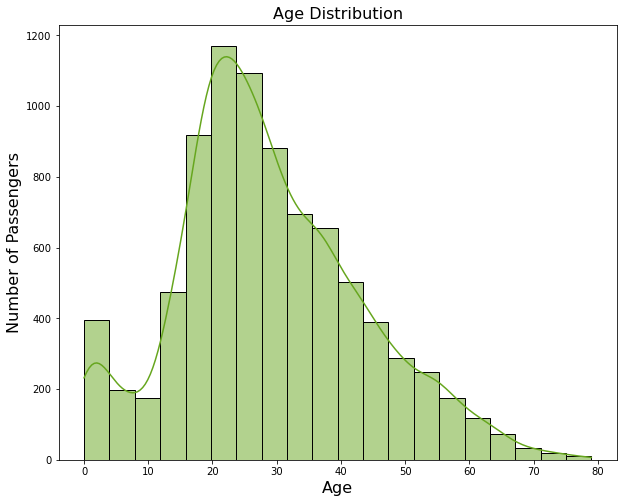

In [221]:
plt.figure(figsize=(10,8))
sns.histplot(age, bins=20 , color=sns.color_palette('Dark2_r')[2],kde=True)
plt.title('Age Distribution', fontsize = 16)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Number of Passengers', fontsize = 16)

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

### Skewness and Kurtosis

Let's check **<span style='color:green'>Skewness</span>**. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right. In cases where one tail is long but the other tail is fat, skewness does not obey a simple rule. For example, a zero value means that the tails on both sides of the mean balance out overall; this is the case for a symmetric distribution, but can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat. A skewness of greater than 1 is generally considered to be skewed, so it would be nice to look into values greater than 1.

In [222]:
skew(age[age.isnull()==False])

0.41902274279363194

As we can see here that skewness value is less than 1 but positive and it is clear graphically to see that.

Let's now talk about **<span style='color:green'>Kurtosis</span>**. In probability theory and statistics, kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable. Like skewness, kurtosis describes the shape of a probability distribution and there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population. Different measures of kurtosis may have different interpretations.

The standard measure of a distribution's kurtosis, originating with Karl Pearson, is a scaled version of the fourth moment of the distribution. This number is related to the tails of the distribution, not its peak; hence, the sometimes-seen characterization of kurtosis as "peakedness" is incorrect. For this measure, higher kurtosis corresponds to greater extremity of deviations (or outliers), and not the configuration of data near the mean.

In [223]:
kurtosis(age[age.isnull()==False])

0.1011684277378051

In [224]:
temp = train_df[train_df.Age.isnull() == False][['Transported','Age']]
temp['Transported'].replace([False, True], [0,1], inplace = True)
temp['Transported'] = temp.groupby('Age')['Transported'].transform('mean')

fig = px.scatter(temp, x='Age',y='Transported', color="Transported", color_continuous_scale='rdylgn', size='Transported')
fig.update_xaxes(showgrid = False, showline = True, gridwidth = 0.05, linecolor = 'black', zeroline = False, linewidth = 2)
fig.update_yaxes(showline = True, gridwidth = 0.05, linecolor = 'black', linewidth = 2, zeroline = False)

# General Styling
fig.update_layout(height=400,
              margin=dict(b=50,r=30,l=100,t=100),
              title = "<span style='font-size:36px; font-family:Times New Roman'>Transported Probability spanning over each age</span>",                  
              plot_bgcolor='white',
              paper_bgcolor = 'white',
              font=dict(family="Times New Roman", size= 13),
              hoverlabel=dict(font_color="black"),
              showlegend=False)
fig.show()

Text(0, 0.5, 'VR Deck Expenditure')

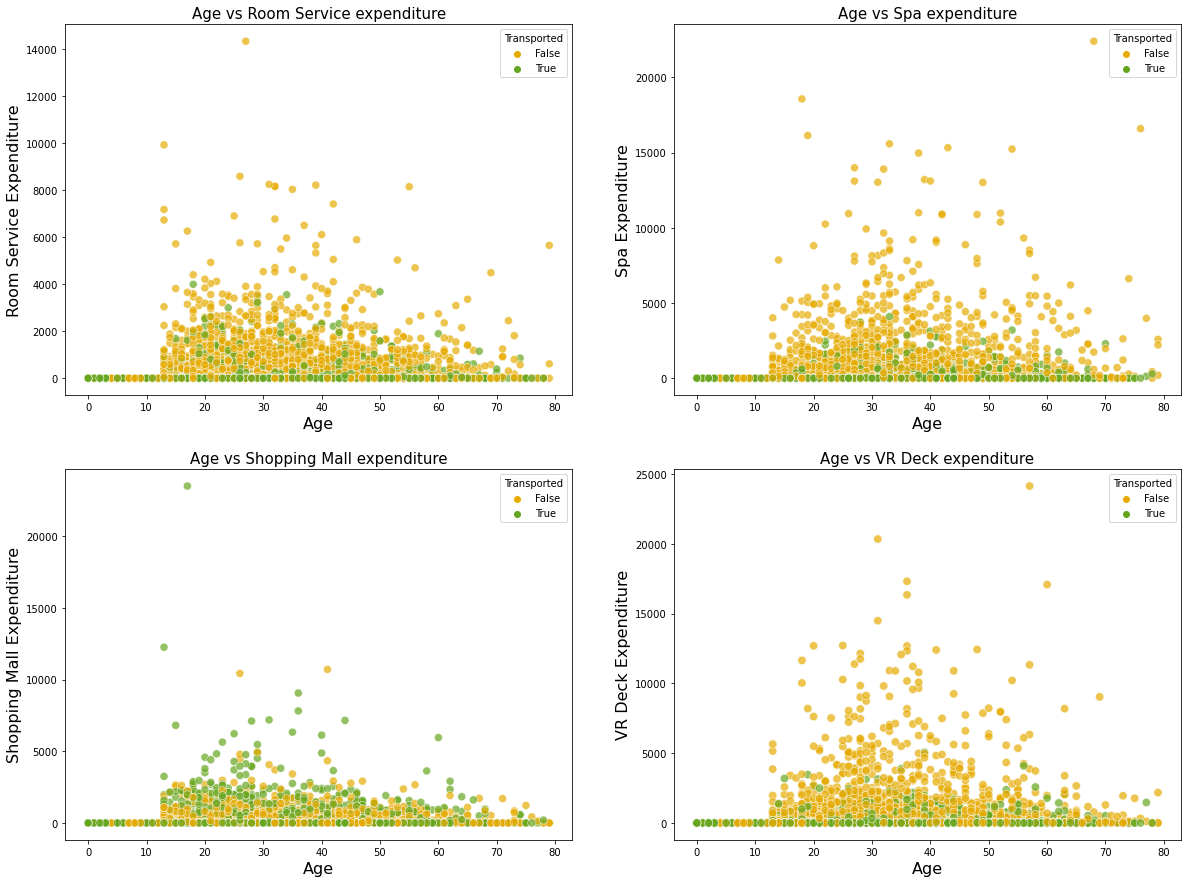

In [225]:
plt.figure(figsize=(20,15))
color=sns.color_palette('Dark2_r')

plt.subplot(2,2,1)
sns.scatterplot(x = age, y = train_df.RoomService, hue=train_df.Transported, palette=color[1:3], s=65, alpha = 0.7)
plt.title('Age vs Room Service expenditure', fontsize = 15)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Room Service Expenditure', fontsize = 16)
#


plt.subplot(2,2,2)
sns.scatterplot(x = age, y = train_df.Spa, hue=train_df.Transported, palette=color[1:3], s=65, alpha = 0.7)
plt.title('Age vs Spa expenditure', fontsize = 15)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Spa Expenditure', fontsize = 16)
#


plt.subplot(2,2,3)
sns.scatterplot(x = age, y = train_df.ShoppingMall, hue=train_df.Transported, palette=color[1:3], s=65, alpha = 0.7)
plt.title('Age vs Shopping Mall expenditure', fontsize = 15)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Shopping Mall Expenditure', fontsize = 16)
#


plt.subplot(2,2,4)
sns.scatterplot(x = age, y = train_df.VRDeck, hue=train_df.Transported, palette=color[1:3], s=70, alpha = 0.7)
plt.title('Age vs VR Deck expenditure', fontsize = 15)
plt.xlabel('Age', fontsize=16)
plt.ylabel('VR Deck Expenditure', fontsize = 16)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* Most of the expenditures are almost negligible and we can see some outliers. 
* There has been tendency of people not getting transported if they are spending on different services.

<div style="color:#162840;display:fill;width:80px;border-radius:10px;
            background-color:#73182a;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 20px;color:white;"><b>VIP</b></p>
</div>

### Whether the passenger has paid for special VIP service during the voyage.

In [226]:
vip = train_df.VIP

In [227]:
print(f'{round(vip.isnull().sum()/len(vip)*100,2)}% data is missing or {vip.isnull().sum()} values out of {len(vip)}')

2.34% data is missing or 203 values out of 8693


### 2.34% data is missing or 203 values out of 8693

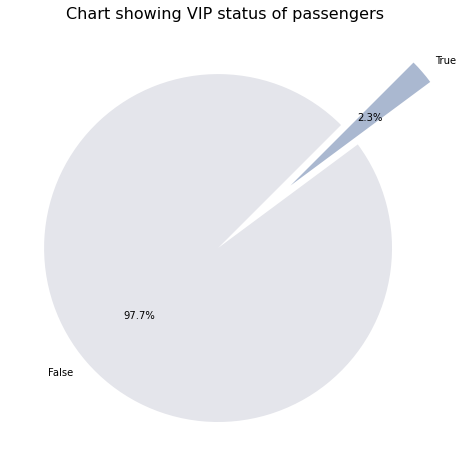

In [228]:
plt.figure(figsize=(12,8))
explode = (0.05, 0.5)
plt.pie(x = vip.value_counts().values, labels=vip.value_counts().index, autopct='%1.1f%%', 
        explode=explode, startangle=45, colors=sns.color_palette('vlag_r')[3:5])
plt.title('Chart showing VIP status of passengers', fontsize=16)
plt.show()

Text(0, 0.5, 'Shopping Mall expenditure')

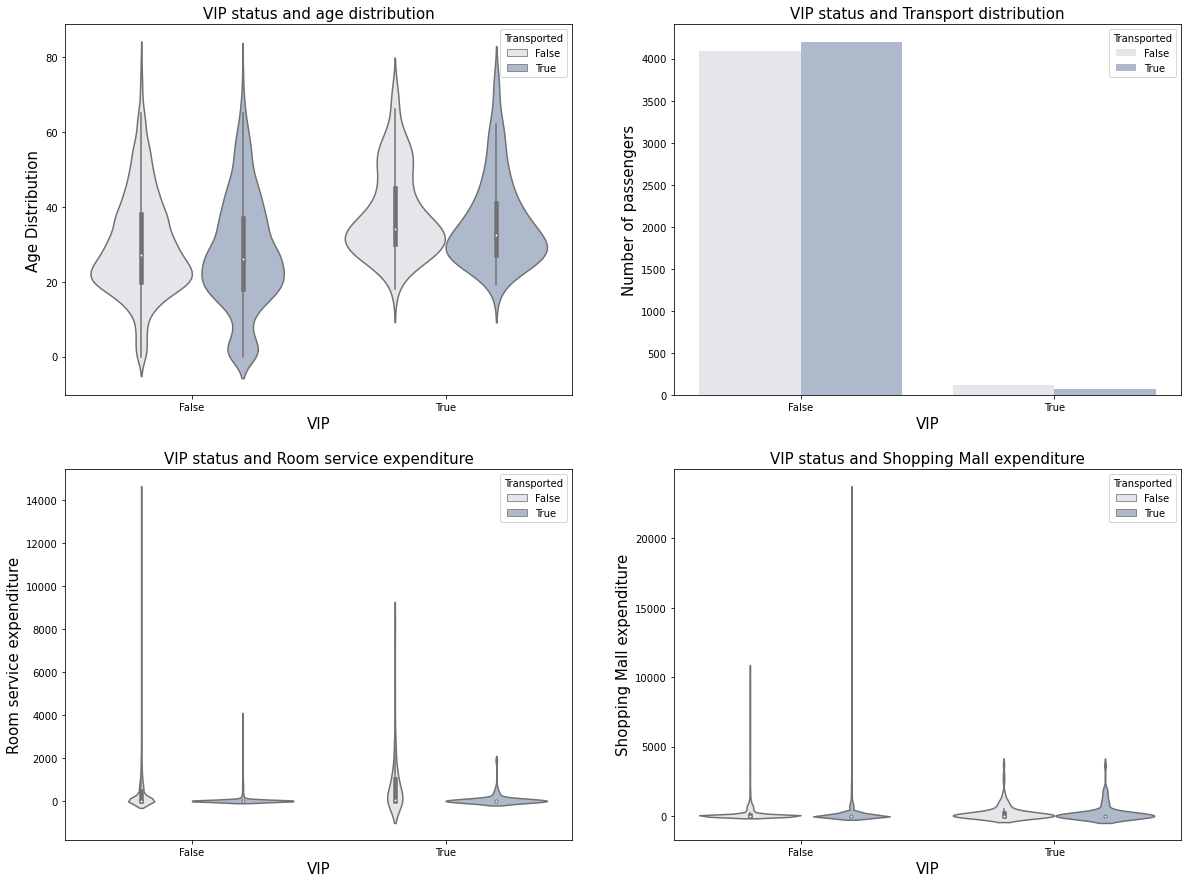

In [229]:
plt.figure(figsize=(20,15))
palette = sns.color_palette('vlag_r')[3:6]

plt.subplot(2,2,1)
sns.violinplot(x = vip,y = age, hue=train_df.Transported, palette=palette)
plt.title('VIP status and age distribution', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Age Distribution', fontsize=15)
#


plt.subplot(2,2,2)
sns.countplot(x = vip, hue=train_df.Transported, palette=palette)
plt.title('VIP status and Transport distribution', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)
#


plt.subplot(2,2,3)
sns.violinplot(x = vip, y = train_df.RoomService, hue = train_df.Transported, palette=palette)
plt.title('VIP status and Room service expenditure', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Room service expenditure', fontsize=15)
#


plt.subplot(2,2,4)
sns.violinplot(x = vip, y = train_df.ShoppingMall, hue = train_df.Transported, palette=palette)
plt.title('VIP status and Shopping Mall expenditure', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Shopping Mall expenditure', fontsize=15)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* The heaviest area where there is some activity in the age group is between 15-50.
* Most of the passengers are non VIP.
* Non VIP people spent most on Room service, whatever they spent...
* There is negligible expenditure at Shopping mall by people who are VIP which is surprising.

Text(0, 0.5, 'VR Deck Expenditure')

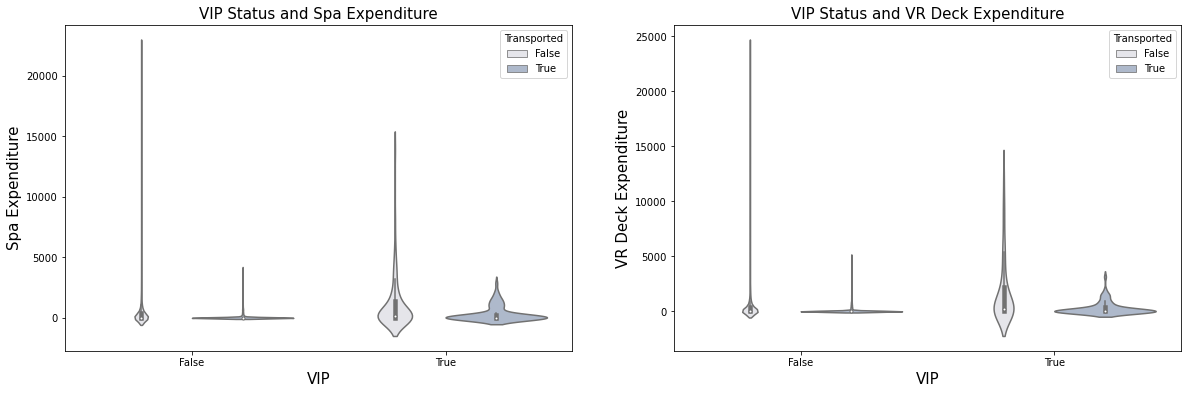

In [230]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.violinplot(x = vip, y = train_df.Spa, hue=train_df.Transported, palette=palette)
plt.title('VIP Status and Spa Expenditure', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Spa Expenditure', fontsize=15)
#


plt.subplot(1,2,2)
sns.violinplot(x = vip, y = train_df.VRDeck, hue = train_df.Transported, palette=palette)
plt.title('VIP Status and VR Deck Expenditure', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('VR Deck Expenditure', fontsize=15)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* There are not many people willing to spend on Spa on a flying spaceship.
* Similarly for the VR Deck experience.

<div style="color:#162840;display:fill;width:170px;border-radius:10px;
            background-color:#73182a;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 20px;color:white;"><b>Room Service</b></p>
</div>

### Amount the passenger has billed at Room Service of the Spaceship Titanic.

In [231]:
roomservice = train_df.RoomService

In [232]:
print(f'{round(roomservice.isnull().sum()/len(roomservice)*100,2)}% data is missing or {roomservice.isnull().sum()} values out of {len(roomservice)}')

2.08% data is missing or 181 values out of 8693


### 2.08% data is missing or 181 values out of 8693

Text(0, 0.5, 'Number of passengers')

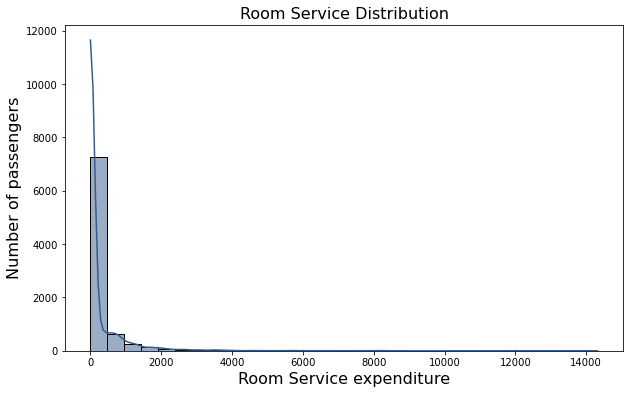

In [233]:
plt.figure(figsize=(10,6))
palette = sns.color_palette('viridis_r')
sns.histplot(x = roomservice, bins=30, color=sns.color_palette('viridis_r')[4], kde=True)
plt.title('Room Service Distribution', fontsize = 16)
plt.xlabel('Room Service expenditure', fontsize=16)
plt.ylabel('Number of passengers', fontsize=16)

### Skewness and Kurtosis

In [234]:
print('Skewness: ', skew(roomservice[roomservice.isnull() == False]))
print('Kurtosis: ', kurtosis(roomservice[roomservice.isnull() == False]))

Skewness:  6.331897992292122
Kurtosis:  65.23476118078804


Text(0, 0.5, 'VR Deck Expenditure')

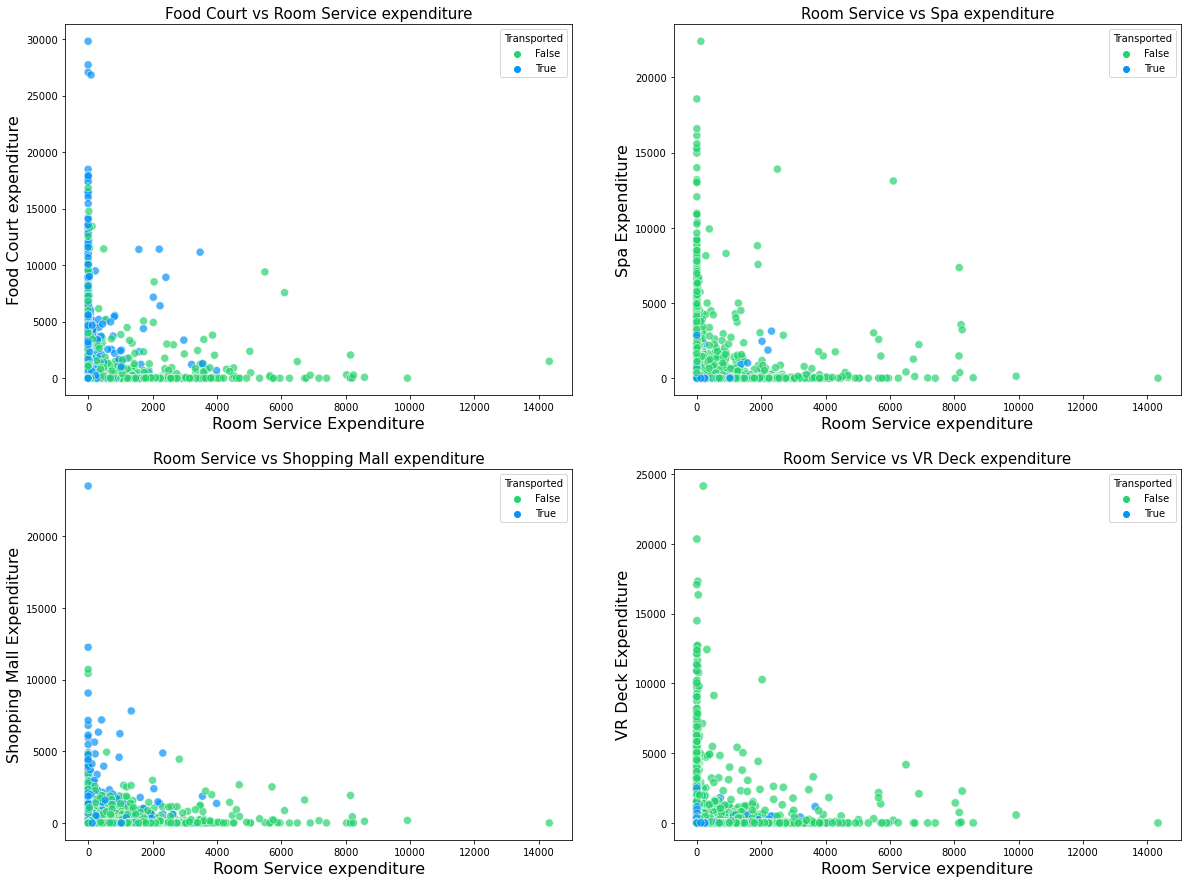

In [235]:
plt.figure(figsize=(20,15))
color=sns.color_palette('terrain_r')

plt.subplot(2,2,1)
sns.scatterplot(x = roomservice, y = train_df.FoodCourt, hue=train_df.Transported, palette=color[4:], s=65, alpha = 0.7)
plt.title('Food Court vs Room Service expenditure', fontsize = 15)
plt.xlabel('Room Service Expenditure', fontsize=16)
plt.ylabel('Food Court expenditure', fontsize = 16)
#


plt.subplot(2,2,2)
sns.scatterplot(x = roomservice, y = train_df.Spa, hue=train_df.Transported, palette=color[4:], s=65, alpha = 0.7)
plt.title('Room Service vs Spa expenditure', fontsize = 15)
plt.xlabel('Room Service expenditure', fontsize=16)
plt.ylabel('Spa Expenditure', fontsize = 16)
#


plt.subplot(2,2,3)
sns.scatterplot(x = roomservice, y = train_df.ShoppingMall, hue=train_df.Transported, palette=color[4:], s=65, alpha = 0.7)
plt.title('Room Service vs Shopping Mall expenditure', fontsize = 15)
plt.xlabel('Room Service expenditure', fontsize=16)
plt.ylabel('Shopping Mall Expenditure', fontsize = 16)
#

plt.subplot(2,2,4)
sns.scatterplot(x = roomservice, y = train_df.VRDeck, hue=train_df.Transported, palette=color[4:], s=70, alpha = 0.7)
plt.title('Room Service vs VR Deck expenditure', fontsize = 15)
plt.xlabel('Room Service expenditure', fontsize=16)
plt.ylabel('VR Deck Expenditure', fontsize = 16)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div> 

* We can see that all the information is highly unbalanced and people having zero room service expenditure are having high expenditure on different services.

<div style="color:#162840;display:fill;width:150px;border-radius:10px;
            background-color:#73182a;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 20px;color:white;"><b>Food Court</b></p>
</div>

### Amount the passenger has billed at Food Court of the Spaceship Titanic.


In [236]:
foodcourt = train_df.FoodCourt

In [237]:
print(f'{round(train_df.FoodCourt.isnull().sum()/len(train_df.FoodCourt)*100,2)}% data is missing or {train_df.FoodCourt.isnull().sum()} values out of {len(train_df.FoodCourt)}')

2.11% data is missing or 183 values out of 8693


### 2.11% data is missing or 183 values out of 8693

In [238]:
print('Skewness: ', skew(foodcourt[foodcourt.isnull() == False]))
print('Kurtosis: ', kurtosis(foodcourt[foodcourt.isnull() == False]))

Skewness:  7.100975929666802
Kurtosis:  73.26346090047063


Text(0, 0.5, 'VR Deck Expenditure')

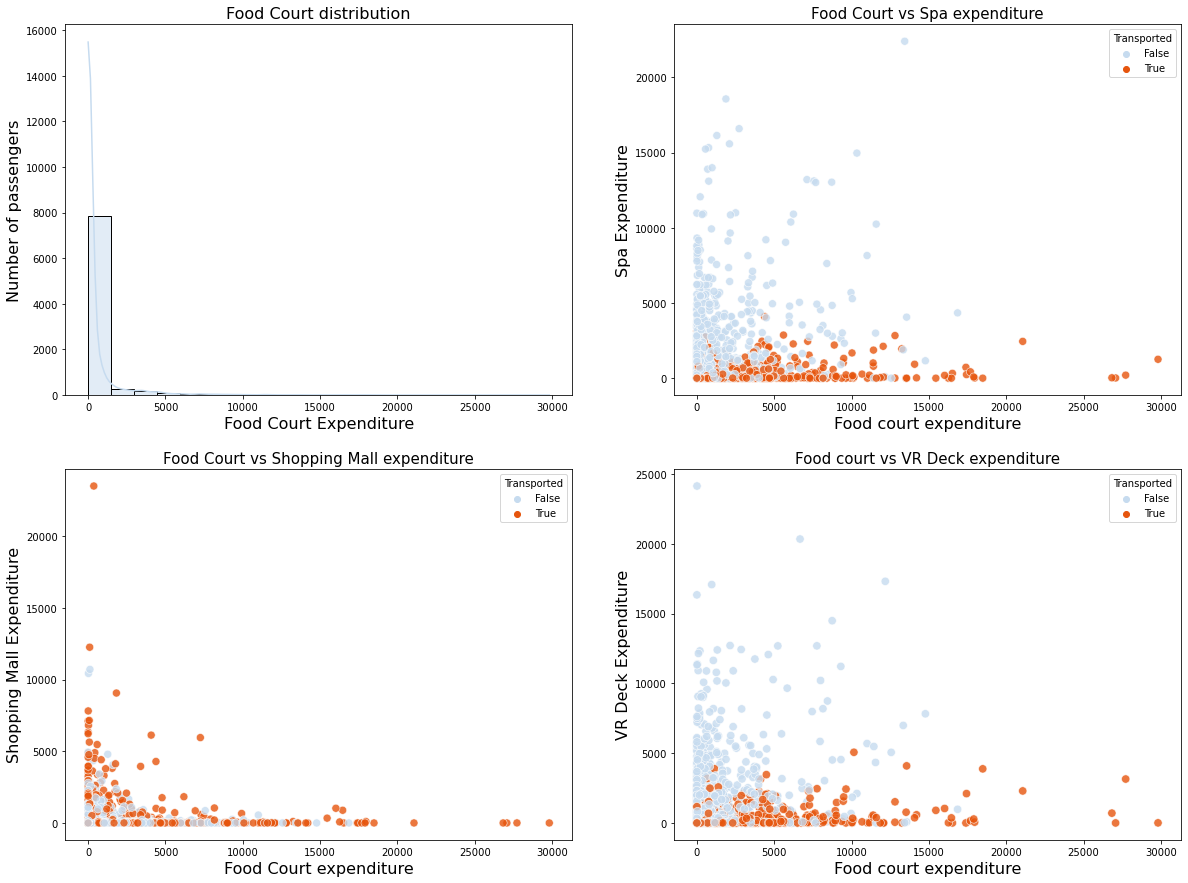

In [239]:
plt.figure(figsize=(20,15))
color=sns.color_palette('tab20c')

plt.subplot(2,2,1)
sns.histplot(x = foodcourt, bins = 20, color=color[3],kde=True)
plt.title('Food Court distribution', fontsize = 16)
plt.xlabel('Food Court Expenditure', fontsize=16)
plt.ylabel('Number of passengers', fontsize = 16)
#


plt.subplot(2,2,2)
sns.scatterplot(x = foodcourt, y = train_df.Spa, hue=train_df.Transported, palette=color[3:5], s=65, alpha = 0.8)
plt.title('Food Court vs Spa expenditure', fontsize = 15)
plt.xlabel('Food court expenditure', fontsize=16)
plt.ylabel('Spa Expenditure', fontsize = 16)
#


plt.subplot(2,2,3)
sns.scatterplot(x = foodcourt, y = train_df.ShoppingMall, hue=train_df.Transported, palette=color[3:5], s=65, alpha = 0.8)
plt.title('Food Court vs Shopping Mall expenditure', fontsize = 15)
plt.xlabel('Food Court expenditure', fontsize=16)
plt.ylabel('Shopping Mall Expenditure', fontsize = 16)
#


plt.subplot(2,2,4)
sns.scatterplot(x = foodcourt, y = train_df.VRDeck, hue=train_df.Transported, palette=color[3:5], s=70, alpha = 0.8)
plt.title('Food court vs VR Deck expenditure', fontsize = 15)
plt.xlabel('Food court expenditure', fontsize=16)
plt.ylabel('VR Deck Expenditure', fontsize = 16)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* As we can see from the Fisher's skewness value, Food court is highly skewed. 
* We can see that all the information is highly unbalanced and people having near zero food court expenditure are having high expenditure on different services.

<div style="color:#162840;display:fill;width:180px;border-radius:10px;
            background-color:#73182a;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 20px;color:white;"><b>Shopping Mall</b></p>
</div>

### Amount the passenger has billed at Shopping Mall of the Spaceship Titanic.


In [240]:
shop = train_df.ShoppingMall

In [241]:
print(f'{round(shop.isnull().sum()/len(shop)*100,2)}% data is missing or {shop.isnull().sum()} values out of {len(shop)}')

2.39% data is missing or 208 values out of 8693


### 2.39% data is missing or 208 values out of 8693


In [242]:
print('Skewness: ', skew(shop[shop.isnull() == False]))
print('Kurtosis: ', kurtosis(shop[shop.isnull() == False]))

Skewness:  12.62532959655537
Kurtosis:  328.6764425183245


Text(0, 0.5, 'VR Deck Expenditure')

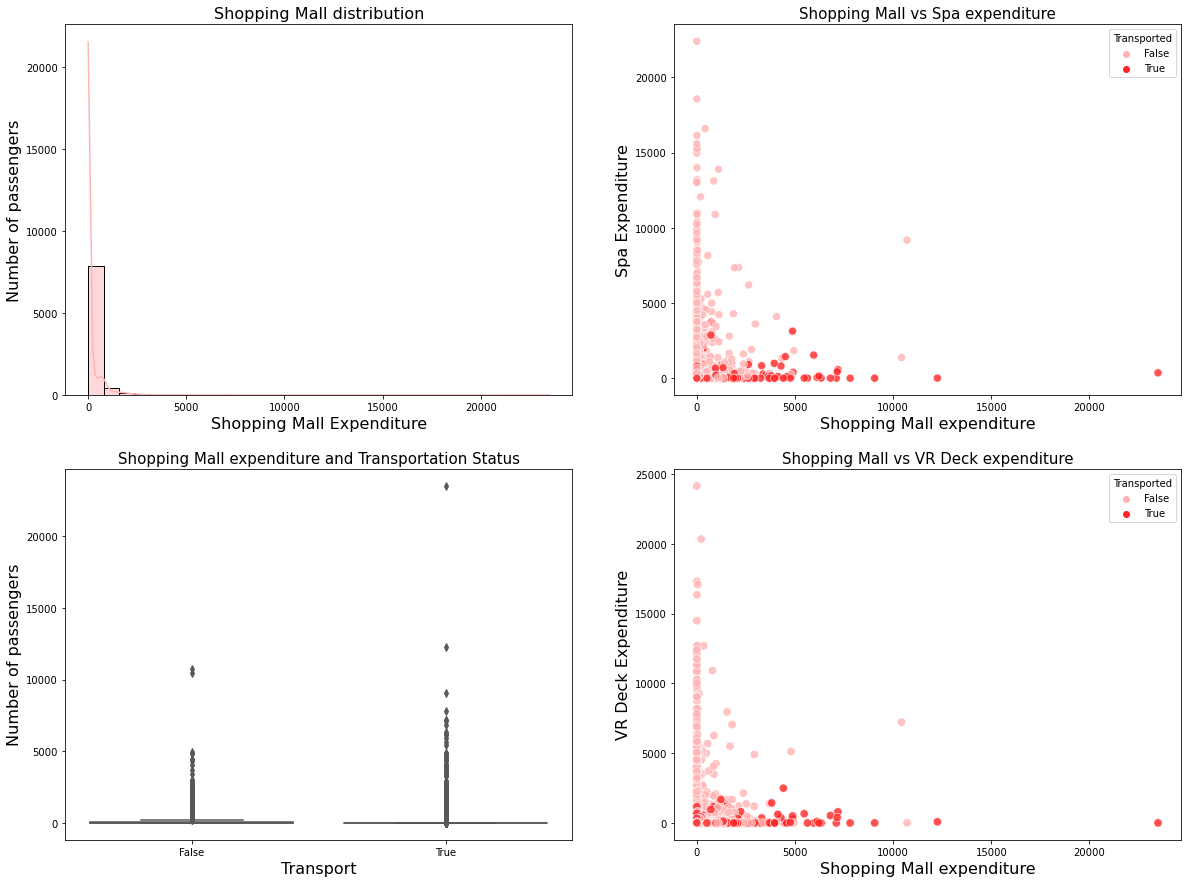

In [243]:
plt.figure(figsize=(20,15))
color=sns.color_palette('seismic')

plt.subplot(2,2,1)
sns.histplot(x = shop, bins = 30,  color=color[3],kde=True)
plt.title('Shopping Mall distribution', fontsize = 16)
plt.xlabel('Shopping Mall Expenditure', fontsize=16)
plt.ylabel('Number of passengers', fontsize = 16)
#


plt.subplot(2,2,2)
sns.scatterplot(x = shop, y = train_df.Spa, hue=train_df.Transported, palette=color[3:5], s=65, alpha = 0.8)
plt.title('Shopping Mall vs Spa expenditure', fontsize = 15)
plt.xlabel('Shopping Mall expenditure', fontsize=16)
plt.ylabel('Spa Expenditure', fontsize = 16)
#


plt.subplot(2,2,3)
sns.boxplot(x = train_df.Transported, y = shop, palette=color[3:5],)
plt.title('Shopping Mall expenditure and Transportation Status', fontsize = 15)
plt.xlabel('Transport', fontsize=16)
plt.ylabel('Number of passengers', fontsize = 16)
#


plt.subplot(2,2,4)
sns.scatterplot(x = shop, y = train_df.VRDeck, hue=train_df.Transported, palette=color[3:5], s=70, alpha = 0.8)
plt.title('Shopping Mall vs VR Deck expenditure', fontsize = 15)
plt.xlabel('Shopping Mall expenditure', fontsize=16)
plt.ylabel('VR Deck Expenditure', fontsize = 16)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* As we can see from the Fisher's skewness value, Shopping Mall is highly skewed. 
* We can see that all the information is highly unbalanced and people having near zero shopping mall expenditure are having high expenditure on different services.

<div style="color:#162840;display:fill;width:80px;border-radius:10px;
            background-color:#73182a;font-size:160%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 20px;color:white;"><b>Spa</b></p>
</div>

### Amount the passenger has billed at Spa of the Spaceship Titanic.


In [244]:
print(f'{round(train_df.Spa.isnull().sum()/len(train_df.Spa)*100,2)}% data is missing or {train_df.Spa.isnull().sum()} values out of {len(train_df.Spa)}')

2.11% data is missing or 183 values out of 8693


### 2.11% data is missing or 183 values out of 8693

In [245]:
print('Skewness: ', skew(train_df.Spa[train_df.Spa.isnull() == False]))
print('Kurtosis: ', kurtosis(train_df.Spa[train_df.Spa.isnull() == False]))

Skewness:  7.634673869355721
Kurtosis:  81.15370279108139


Text(0, 0.5, 'VR Deck Expenditure')

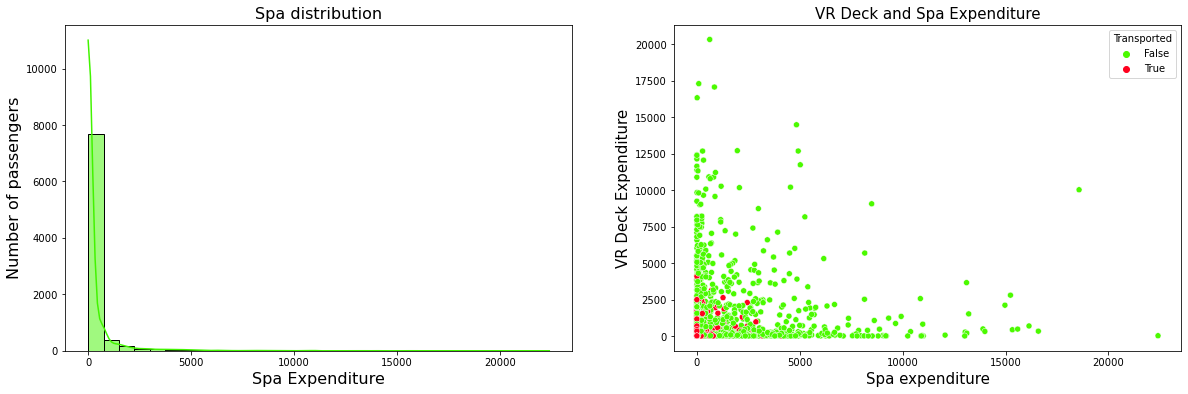

In [246]:
plt.figure(figsize=(20,6))
color = sns.color_palette('prism_r')

plt.subplot(1,2,1)
sns.histplot(x = train_df.Spa, bins = 30,  color=color[3],kde=True)
plt.title('Spa distribution', fontsize = 16)
plt.xlabel('Spa Expenditure', fontsize=16)
plt.ylabel('Number of passengers', fontsize = 16)
#


plt.subplot(1,2,2)
sns.scatterplot(x = train_df.Spa, y = train_df.VRDeck, hue=train_df.Transported, palette=color[1:3])
plt.title('VR Deck and Spa Expenditure', fontsize = 15)
plt.xlabel('Spa expenditure', fontsize=15)
plt.ylabel('VR Deck Expenditure', fontsize=15)
#

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Observations:</b></p>
</div>

* As we can see from the Fisher's skewness value, Spa is highly skewed. 
* We can see that all the information is highly unbalanced and people having near zero Spa expenditure are having high expenditure on different services.

<div style="color:white;display:fill;border-radius:10px;
            background-color:black;font-size:200%;
            font-family:Nexa;letter-spacing:0.6px;padding:10px">
    <p style="padding: 8px;color:white;text-align:center"><b>Data Preprocessing</b></p>
</div>


### Now we have done exhaustive visualization of our data that helped us to understand its features, its uniqueness and its quirkiness. We have some features that are highly skewed, on the other hand we have some features that are perfectly balanced. 
### Before we can create machine learning model for our data, it is essential to make the dataset balanced, clean and structured. These topics can be further subdivided into separate components:
* Balancing the dataset - Not every machine learning model is affected by outliers present in our data such as decision trees, random forests, support vector machines i.e. they are robust to outliers. But many other algorithms are sensitive to these types of noise and so it is a good idea to eliminate any kind of noise from the system.
* Cleaning the dataset - We will always encounter some missing or NA values in our dataset and that is not okay with our fellow machine learning models. So, it is essential to clean the dataset of all the deficiencies keeping the data format in mind. Note - There are some algorithms that can handle missing values like XGBoost whereas most algorithms require non null values.

* Structuring the dataset - It is also important to note that, ML models are basically mathematical functions and hence can accept only numeric data to work upon. This is not true for some algorithms like decision trees, random forests where we can also use categorical features along with numeric ones. Note - There are some algorithms that can handle categorical values like catboost, decision trees, etc. whereas most algorithms require non null values.

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:140%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Data Splitting</b></p>
</div>

<div style="color:#3c4232;display:fill;border-radius:4px;
            background-color:#d3deed;font-size:110%;
            font-family:Helvetica;letter-spacing:0.6px">
    <p style="padding: 8px;color:#162840;">
        <b>Also, one of the crucial decisions that we must take before data processing is to understand how the splitting of data will affect our model's performance. Ideally, we firstly want to train our model using the available training data, then to evaluate the performance and tune hyperparameters of our model on a validation set and finally to predict on testing data. 
        But in real life, the story is not that simple. Sometimes, we are only able get our hands on some training data without any validation/test data which keeps us in the blind of how our model would perform on unseen new data. But there is still hope, we can create our own validation data from the training data. There is nice article about this : https://www.fast.ai/2017/11/13/validation-sets/ . </b>
    </p>
</div>

<div style="color:#162840;display:fill;border-radius:10px;
            background-color:#162840;font-size:150%;
            font-family:Nexa;letter-spacing:0.6px">
    <p style="padding: 8px;color:white;"><b>Data Leakage</b></p>
</div>

<div style="color:#3c4232;display:fill;border-radius:4px;
            background-color:#d3deed;font-size:110%;
            font-family:Helvetica;letter-spacing:0.6px">
    <p style="padding: 8px;color:#162840;">
        <b>Data leakage (or leakage) happens when your training data contains information about the target, but similar data will not be available when the model is used for prediction. This leads to high performance on the training set (and possibly even the validation data), but the model will perform poorly in production. There are two main types of leakage: target leakage and train-test contamination. </b>
    </p>
</div>
<div style="color:#3c4232;display:fill;border-radius:0px;
            background-color:#d3deed;font-size:110%;
            font-family:Helvetica;letter-spacing:0.6px">
    <p style="padding: 8px;color:#162840;">
        <b>1. Target Leakage -  Target leakage occurs when your predictors include data that will not be available at the time you make predictions. It is important to think about target leakage in terms of the timing or chronological order that data becomes available, not merely whether a feature helps make good predictions.</b>
    </p>
</div>
<div style="color:#3c4232;display:fill;border-radius:0px;
            background-color:#d3deed;font-size:110%;
            font-family:Helvetica;letter-spacing:0.6px">
    <p style="padding: 8px;color:#162840;">
        <b>2. Train-Test Contamination - A different type of leak occurs when you aren't careful to distinguish training data from validation data. Recall that validation is meant to be a measure of how the model does on data that it hasn't considered before. You can corrupt this process in subtle ways if the validation data affects the preprocessing behavior. This is sometimes called train-test contamination.</b>
    </p>
</div>

So we shall first split our data into three sets namely: Train/Val/Test!

This is also because the distribution of validation and test set should be as close as possible in order for val set to simulate real world scenario.

We already have Train and test sets. We can create our validation set from train set. This would present data leakage and also we would have a perfect structure for our pipeline

In [247]:
train_df.shape

(8693, 16)

In [248]:
test_df.shape

(4277, 15)

In [249]:
transported = train_df.pop('Transported')

In [250]:
train_pass_id = train_df.pop('PassengerId')
train_name = train_df.pop('Name')

test_pass_id = test_df.pop('PassengerId')
test_name = test_df.pop('Name')

#### Now we have all three datasets to begin our data preprocessing step! Firstly we shall try to balance our dataset by removing unwanted noise.

## Outlier Detection

### Outliers Definition
Outlier is an observation that is numerically distant from the rest of the data or in a simple word it is the value which is out of the range of that numerical distribution. Let’s take an example to check what happens to a data set with and data set without outliers. Outlier can be of two types: Univariate and Multivariate. These outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space.

### 1. Univariate Outliers Detection

 We'll start by detecting whether there are outliers in our dataset or not. 

#### Grubbs Test

$$
\begin{array}{l}{\text { Grubbs' test is defined for the hypothesis: }} \\ {\begin{array}{ll}{\text { Ho: }}  {\text { There are no outliers in the data set }} \\ {\mathrm{H}_{\mathrm{1}} :}  {\text { There is exactly one outlier in the data set }}\end{array}}\end{array}
$$
$$
\begin{array}{l}{\text {The Grubbs' test statistic is defined as: }} \\ {\qquad G_{calculated}=\frac{\max \left|X_{i}-\overline{X}\right|}{SD}} \\ {\text { with } \overline{X} \text { and } SD \text { denoting the sample mean and standard deviation, respectively. }} \end{array}
$$
$$
G_{critical}=\frac{(N-1)}{\sqrt{N}} \sqrt{\frac{\left(t_{\alpha /(2 N), N-2}\right)^{2}}{N-2+\left(t_{\alpha /(2 N), N-2}\right)^{2}}}
$$
$$
\begin{array}{l}{\text { If the calculated value is greater than critical, you can reject the null hypothesis and conclude that one of the values is an outlier }}\end{array}$$

In [251]:
def grubbs_test(x, feature):
    
    #length of the feature
    n = len(x)
    
    #mean of the feature
    meanx = np.mean(x)
    
    #standard deviation of the feature
    sdx = np.std(x)
    
    # calculated g value
    g_cal = max(abs(x-meanx))/sdx
    
    # Here we have one t_value also which is known as student t-test and is calculated as follows:
    t_val = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    
    # now we find critical g value given a certain feature
    g_critical = ((n-1)/np.sqrt(n))*np.sqrt( np.square(t_val)*1/(n-2+np.square(t_val)))
    
    # printing different statistical values
    print(f'Feature: {feature}')
    print(f'Calculated G value: {g_cal}')
    print(f'! Critical G value ! : {g_critical}')
    
    if g_critical > g_cal:
        print("As calculated value is less than critical value, Accept null hypothesis and conclude that there is no outlier\n")
    else:
        print("Houston! We have a problem, As calculated value is more than critical value, Reject null hypothesis and conclude that there is an outlier\n")


In [252]:
# For training set

for col in train_df.select_dtypes('float64').columns:
    grubbs_test(train_df[col],col)

Feature: cabin_Num
Calculated G value: 2.5274298087950204
! Critical G value ! : 4.532763233950485
As calculated value is less than critical value, Accept null hypothesis and conclude that there is no outlier

Feature: Age
Calculated G value: 3.4629679099346924
! Critical G value ! : 4.532763233950485
As calculated value is less than critical value, Accept null hypothesis and conclude that there is no outlier

Feature: RoomService
Calculated G value: 21.15309315773959
! Critical G value ! : 4.532763233950485
Houston! We have a problem, As calculated value is more than critical value, Reject null hypothesis and conclude that there is an outlier

Feature: FoodCourt
Calculated G value: 18.217091957330073
! Critical G value ! : 4.532763233950485
Houston! We have a problem, As calculated value is more than critical value, Reject null hypothesis and conclude that there is an outlier

Feature: ShoppingMall
Calculated G value: 38.56421633288498
! Critical G value ! : 4.532763233950485
Houston!

In [253]:
# For testing set

for col in test_df.select_dtypes('float64').columns:
    grubbs_test(test_df[col],col)

Feature: cabin_Num
Calculated G value: 2.485540974979005
! Critical G value ! : 4.378617628680692
As calculated value is less than critical value, Accept null hypothesis and conclude that there is no outlier

Feature: Age
Calculated G value: 3.5508578749246342
! Critical G value ! : 4.378617628680692
As calculated value is less than critical value, Accept null hypothesis and conclude that there is no outlier

Feature: RoomService
Calculated G value: 18.696664646874584
! Critical G value ! : 4.378617628680692
Houston! We have a problem, As calculated value is more than critical value, Reject null hypothesis and conclude that there is an outlier

Feature: FoodCourt
Calculated G value: 16.257834636671046
! Critical G value ! : 4.378617628680692
Houston! We have a problem, As calculated value is more than critical value, Reject null hypothesis and conclude that there is an outlier

Feature: ShoppingMall
Calculated G value: 14.471058959917096
! Critical G value ! : 4.378617628680692
Houston

### 2. Multivariate Outlier Detection and removal

#### DBSCAN 

Density-Based Spatial Clustering of Applications with Noise:
This is a clustering algorithm (an alternative to K-Means) that clusters points together and identifies any points not belonging to a cluster as outliers. It’s like K-means, except the number of clusters does not need to be specified in advance.
DBScan has three important concepts:
- Core Points: In order to understand the concept of the core points, we need to visit some of the hyperparameters used to define DBScan job. First hyperparameter (HP) is min_samples. This is simply the minimum number of core points needed in order to form a cluster. second important HP is 'eps'. 'eps' is the maximum distance between two samples for them to be considered as in the same cluster.
- Border Points are in the same cluster as core points but much further away from the centre of the cluster.
- Everything else is called Noise Points, those are data points that do not belong to any cluster. They can be anomalous or non-anomalous and they need further investigation. Now, let’s see some code.
- The data points should first be standardised to have same mean and standard deviation.


In [254]:
train_df.head()

HomePlanet CryoSleep cabin_Deck  cabin_Num cabin_Side  Destination   Age  \
0     Europa     False          B        0.0          P  TRAPPIST-1e  39.0   
1      Earth     False          F        0.0          S  TRAPPIST-1e  24.0   
2     Europa     False          A        0.0          S  TRAPPIST-1e  58.0   
3     Europa     False          A        0.0          S  TRAPPIST-1e  33.0   
4      Earth     False          F        1.0          S  TRAPPIST-1e  16.0   

     VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  
0  False          0.0        0.0           0.0     0.0     0.0  
1  False        109.0        9.0          25.0   549.0    44.0  
2   True         43.0     3576.0           0.0  6715.0    49.0  
3  False          0.0     1283.0         371.0  3329.0   193.0  
4  False        303.0       70.0         151.0   565.0     2.0

In [255]:
def dbscan(feature):
    
    # Scale data first
    data = pd.concat([transported, train_df[feature]], axis=1)
    data = data[data[feature].isnull() == False].copy().values
    data = StandardScaler().fit_transform(data)
    
    print(data.shape)
    
    # Fit DBSCAN algorithm
    db = DBSCAN(eps=3.0, min_samples=10).fit(data)
    
    # Fetch the labels
    labels = db.labels_

    plt.figure(figsize=(8,6))

    unique_labels = set(labels)
    colors = ['green', 'blue']

    for color,label in zip(colors, unique_labels):
        sample_mask = [True if l == label else False for l in labels]
        plt.plot(data[:,0][sample_mask], data[:, 1][sample_mask], 'o', color=color)
    plt.xlabel('Transported')
    plt.ylabel(feature)

    print(pd.Series(labels).value_counts())

#### Training Set

In [256]:
train_df.shape

(8693, 13)

In [257]:
train_df = pd.concat([train_df, transported], axis=1)

(8485, 2)
 0    8480
-1       5
dtype: int64


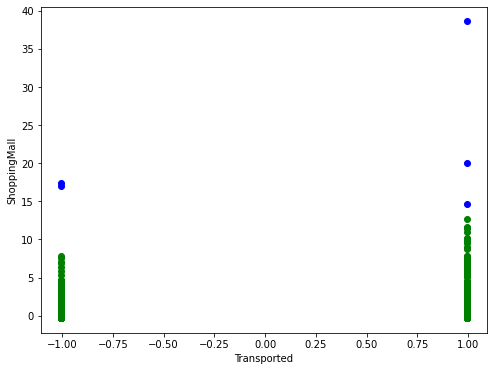

In [258]:
dbscan('ShoppingMall')

In [259]:
index_drop = train_df[['ShoppingMall','Transported']].sort_values(by='ShoppingMall', ascending=False).iloc[:3,:].index
train_df.drop(index_drop, axis=0, inplace=True)

(8509, 2)
 0    8508
-1       1
dtype: int64


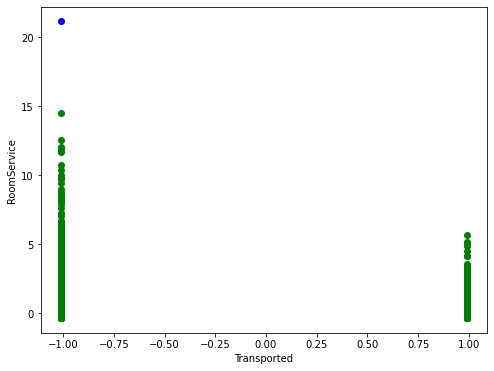

In [260]:
dbscan('RoomService')

In [261]:
index_drop = train_df[['RoomService','Transported']].sort_values(by='RoomService', ascending=False).iloc[:2,:].index
train_df.drop(index_drop, axis=0, inplace=True)

(8505, 2)
 0    8501
-1       4
dtype: int64


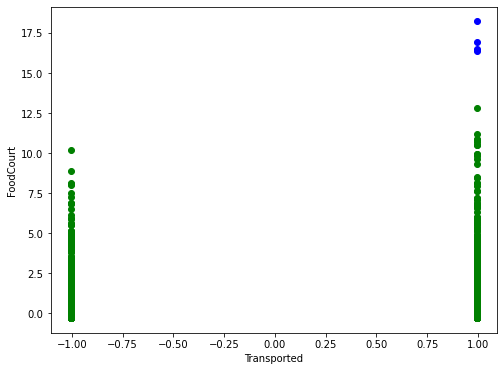

In [262]:
dbscan('FoodCourt')

In [263]:
index_drop = train_df[['FoodCourt','Transported']].sort_values(by='FoodCourt', ascending=False).iloc[:3,:].index
train_df.drop(index_drop, axis=0, inplace=True)

(8502, 2)
 0    8501
-1       1
dtype: int64


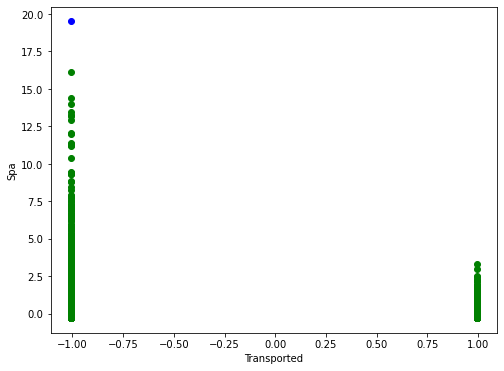

In [264]:
dbscan('Spa')

In [265]:
index_drop = train_df[['Spa','Transported']].sort_values(by='Spa', ascending=False).iloc[:1,:].index
train_df.drop(index_drop, axis=0, inplace=True)

(8496, 2)
 0    8494
-1       2
dtype: int64


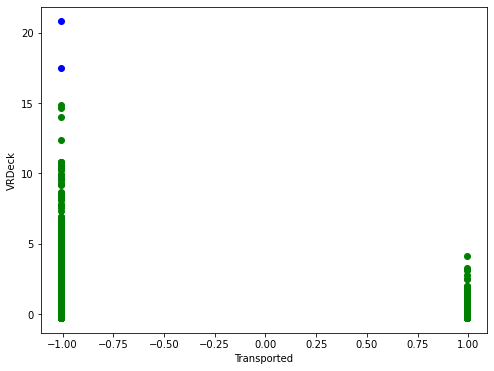

In [266]:
dbscan('VRDeck')

In [267]:
index_drop = train_df[['VRDeck','Transported']].sort_values(by='VRDeck', ascending=False).iloc[:2,:].index
train_df.drop(index_drop, axis=0, inplace=True)

In [268]:
X_train = train_df.iloc[:,:-1]
y_train = train_df['Transported']

## Handling Missing Data

In [269]:
X_train_normal = X_train.copy(deep=True)

In [270]:
X_train.shape   

(8682, 13)

In [271]:
selector = make_column_selector(dtype_include=object)
categorical_data_columns = selector(X_train)
cat_train_data = X_train[categorical_data_columns]
cat_train_data.head()

HomePlanet CryoSleep cabin_Deck cabin_Side  Destination    VIP
0     Europa     False          B          P  TRAPPIST-1e  False
1      Earth     False          F          S  TRAPPIST-1e  False
2     Europa     False          A          S  TRAPPIST-1e   True
3     Europa     False          A          S  TRAPPIST-1e  False
4      Earth     False          F          S  TRAPPIST-1e  False

In [272]:
con_selector = make_column_selector(dtype_exclude=[object, bool])
continuous_data_columns = con_selector(X_train)
cont_train_data = X_train[continuous_data_columns]
cont_train_data.head()

cabin_Num   Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0        0.0  39.0          0.0        0.0           0.0     0.0     0.0
1        0.0  24.0        109.0        9.0          25.0   549.0    44.0
2        0.0  58.0         43.0     3576.0           0.0  6715.0    49.0
3        0.0  33.0          0.0     1283.0         371.0  3329.0   193.0
4        1.0  16.0        303.0       70.0         151.0   565.0     2.0

https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

#### Handling Numerical columns

In [273]:
imputer = SimpleImputer(missing_values= np.nan ,strategy='median')
imputer = imputer.fit(X_train[continuous_data_columns])
X_train[continuous_data_columns] = imputer.transform(X_train[continuous_data_columns])
X_train_normal[continuous_data_columns] = imputer.transform(X_train_normal[continuous_data_columns])

In [274]:
# Applying the same method to test data
imputer = imputer.fit(test_df[continuous_data_columns])
test_df[continuous_data_columns] = imputer.fit_transform(test_df[continuous_data_columns])

#### Handling categorical columns

In [275]:
mode_imputer = SimpleImputer(missing_values= np.nan , strategy='most_frequent')
mode_imputer = mode_imputer.fit(X_train[categorical_data_columns])
X_train[categorical_data_columns] = mode_imputer.transform(X_train[categorical_data_columns])

In [276]:
# Applying the same method to test data
mode_imputer = mode_imputer.fit(test_df[categorical_data_columns])
test_df[categorical_data_columns] = mode_imputer.fit_transform(test_df[categorical_data_columns])

In [277]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8682 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8682 non-null   object 
 1   CryoSleep     8682 non-null   object 
 2   cabin_Deck    8682 non-null   object 
 3   cabin_Num     8682 non-null   float64
 4   cabin_Side    8682 non-null   object 
 5   Destination   8682 non-null   object 
 6   Age           8682 non-null   float64
 7   VIP           8682 non-null   object 
 8   RoomService   8682 non-null   float64
 9   FoodCourt     8682 non-null   float64
 10  ShoppingMall  8682 non-null   float64
 11  Spa           8682 non-null   float64
 12  VRDeck        8682 non-null   float64
dtypes: float64(7), object(6)
memory usage: 949.6+ KB


In [278]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   object 
 2   cabin_Deck    4277 non-null   object 
 3   cabin_Num     4277 non-null   float64
 4   cabin_Side    4277 non-null   object 
 5   Destination   4277 non-null   object 
 6   Age           4277 non-null   float64
 7   VIP           4277 non-null   object 
 8   RoomService   4277 non-null   float64
 9   FoodCourt     4277 non-null   float64
 10  ShoppingMall  4277 non-null   float64
 11  Spa           4277 non-null   float64
 12  VRDeck        4277 non-null   float64
dtypes: float64(7), object(6)
memory usage: 434.5+ KB


## Label encoding of categorical variables

Some machine learning algorithms can deal with categorical labels such as decision trees. So we can create two sets of data where one contains categorical features and other not.

In [279]:
def label_encode(df,col):
    df[col] = LabelEncoder().fit_transform(df[col])
    return df[col]

In [280]:
categorical_data_columns

['HomePlanet', 'CryoSleep', 'cabin_Deck', 'cabin_Side', 'Destination', 'VIP']

In [281]:
X_train_cat = X_train.copy(deep=True)

In [282]:
test_df_cat = test_df.copy(deep=True)

In [283]:
X_train_cat

HomePlanet CryoSleep cabin_Deck  cabin_Num cabin_Side    Destination  \
0        Europa     False          B        0.0          P    TRAPPIST-1e   
1         Earth     False          F        0.0          S    TRAPPIST-1e   
2        Europa     False          A        0.0          S    TRAPPIST-1e   
3        Europa     False          A        0.0          S    TRAPPIST-1e   
4         Earth     False          F        1.0          S    TRAPPIST-1e   
...         ...       ...        ...        ...        ...            ...   
8688     Europa     False          A       98.0          P    55 Cancri e   
8689      Earth      True          G     1499.0          S  PSO J318.5-22   
8690      Earth     False          G     1500.0          S    TRAPPIST-1e   
8691     Europa     False          E      608.0          S    55 Cancri e   
8692     Europa     False          E      608.0          S    TRAPPIST-1e   

       Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  
0     39.0  False          0.0        0.0           0.0     0.0     0.0  
1     24.0  False        109.0        9.0          25.0   549.0    44.0  
2     58.0   True         43.0     3576.0           0.0  6715.0    49.0  
3     33.0  False          0.0     1283.0         371.0  3329.0   193.0  
4     16.0  False        303.0       70.0         151.0   565.0     2.0  
...    ...    ...          ...        ...           ...     ...     ...  
8688  41.0   True          0.0     6819.0           0.0  1643.0    74.0  
8689  18.0  False          0.0        0.0           0.0     0.0     0.0  
8690  26.0  False          0.0        0.0        1872.0     1.0     0.0  
8691  32.0  False          0.0     1049.0           0.0   353.0  3235.0  
8692  44.0  False        126.0     4688.0           0.0     0.0    12.0  

[8682 rows x 13 columns]

In [284]:
test_df_cat

HomePlanet CryoSleep cabin_Deck  cabin_Num cabin_Side    Destination  \
0         Earth      True          G        3.0          S    TRAPPIST-1e   
1         Earth     False          F        4.0          S    TRAPPIST-1e   
2        Europa      True          C        0.0          S    55 Cancri e   
3        Europa     False          C        1.0          S    TRAPPIST-1e   
4         Earth     False          F        5.0          S    TRAPPIST-1e   
...         ...       ...        ...        ...        ...            ...   
4272      Earth      True          G     1496.0          S    TRAPPIST-1e   
4273      Earth     False          F      442.0          S    TRAPPIST-1e   
4274       Mars      True          D      296.0          P    55 Cancri e   
4275     Europa     False          D      297.0          P    TRAPPIST-1e   
4276      Earth      True          G     1498.0          S  PSO J318.5-22   

       Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  
0     27.0  False          0.0        0.0           0.0     0.0     0.0  
1     19.0  False          0.0        9.0           0.0  2823.0     0.0  
2     31.0  False          0.0        0.0           0.0     0.0     0.0  
3     38.0  False          0.0     6652.0           0.0   181.0   585.0  
4     20.0  False         10.0        0.0         635.0     0.0     0.0  
...    ...    ...          ...        ...           ...     ...     ...  
4272  34.0  False          0.0        0.0           0.0     0.0     0.0  
4273  42.0  False          0.0      847.0          17.0    10.0   144.0  
4274  26.0  False          0.0        0.0           0.0     0.0     0.0  
4275  26.0  False          0.0     2680.0           0.0     0.0   523.0  
4276  43.0  False          0.0        0.0           0.0     0.0     0.0  

[4277 rows x 13 columns]

In [285]:
for col in categorical_data_columns:
    X_train[col] = label_encode(X_train,col)

In [286]:
for col in categorical_data_columns:
    test_df[col] = label_encode(test_df,col)

In [287]:
# As we can see all the features are numerical data types and fit to feed into the network.

X_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8682 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8682 non-null   int32  
 1   CryoSleep     8682 non-null   int32  
 2   cabin_Deck    8682 non-null   int32  
 3   cabin_Num     8682 non-null   float64
 4   cabin_Side    8682 non-null   int32  
 5   Destination   8682 non-null   int32  
 6   Age           8682 non-null   float64
 7   VIP           8682 non-null   int32  
 8   RoomService   8682 non-null   float64
 9   FoodCourt     8682 non-null   float64
 10  ShoppingMall  8682 non-null   float64
 11  Spa           8682 non-null   float64
 12  VRDeck        8682 non-null   float64
dtypes: float64(7), int32(6)
memory usage: 746.1 KB


In [288]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   int32  
 1   CryoSleep     4277 non-null   int32  
 2   cabin_Deck    4277 non-null   int32  
 3   cabin_Num     4277 non-null   float64
 4   cabin_Side    4277 non-null   int32  
 5   Destination   4277 non-null   int32  
 6   Age           4277 non-null   float64
 7   VIP           4277 non-null   int32  
 8   RoomService   4277 non-null   float64
 9   FoodCourt     4277 non-null   float64
 10  ShoppingMall  4277 non-null   float64
 11  Spa           4277 non-null   float64
 12  VRDeck        4277 non-null   float64
dtypes: float64(7), int32(6)
memory usage: 334.3 KB


## Numeric Data Normalization 

In [289]:
# The transformation is given as below
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

In [290]:
minmax_scaler = MinMaxScaler()

In [291]:
scaler = StandardScaler()

In [292]:
continuous_data_columns

['cabin_Num',
 'Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

In [293]:
X_train_cat

HomePlanet CryoSleep cabin_Deck  cabin_Num cabin_Side    Destination  \
0        Europa     False          B        0.0          P    TRAPPIST-1e   
1         Earth     False          F        0.0          S    TRAPPIST-1e   
2        Europa     False          A        0.0          S    TRAPPIST-1e   
3        Europa     False          A        0.0          S    TRAPPIST-1e   
4         Earth     False          F        1.0          S    TRAPPIST-1e   
...         ...       ...        ...        ...        ...            ...   
8688     Europa     False          A       98.0          P    55 Cancri e   
8689      Earth      True          G     1499.0          S  PSO J318.5-22   
8690      Earth     False          G     1500.0          S    TRAPPIST-1e   
8691     Europa     False          E      608.0          S    55 Cancri e   
8692     Europa     False          E      608.0          S    TRAPPIST-1e   

       Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  
0     39.0  False          0.0        0.0           0.0     0.0     0.0  
1     24.0  False        109.0        9.0          25.0   549.0    44.0  
2     58.0   True         43.0     3576.0           0.0  6715.0    49.0  
3     33.0  False          0.0     1283.0         371.0  3329.0   193.0  
4     16.0  False        303.0       70.0         151.0   565.0     2.0  
...    ...    ...          ...        ...           ...     ...     ...  
8688  41.0   True          0.0     6819.0           0.0  1643.0    74.0  
8689  18.0  False          0.0        0.0           0.0     0.0     0.0  
8690  26.0  False          0.0        0.0        1872.0     1.0     0.0  
8691  32.0  False          0.0     1049.0           0.0   353.0  3235.0  
8692  44.0  False        126.0     4688.0           0.0     0.0    12.0  

[8682 rows x 13 columns]

In [294]:
def scale_the_data(df):
    for col in continuous_data_columns:
        df[col] = scaler.fit_transform(np.array(df[col]).reshape(-1,1))

In [295]:
scale_the_data(X_train)

In [296]:
scale_the_data(test_df)

In [297]:
X_train

HomePlanet  CryoSleep  cabin_Deck  cabin_Num  cabin_Side  Destination  \
0              1          0           1  -1.177978           0            2   
1              0          0           5  -1.177978           1            2   
2              1          0           0  -1.177978           1            2   
3              1          0           0  -1.177978           1            2   
4              0          0           5  -1.176005           1            2   
...          ...        ...         ...        ...         ...          ...   
8688           1          0           0  -0.984578           0            0   
8689           0          1           6   1.780253           1            1   
8690           0          0           6   1.782226           1            2   
8691           1          0           4   0.021891           1            0   
8692           1          0           4   0.021891           1            2   

           Age  VIP  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  
0     0.712597    0    -0.342556  -0.290578     -0.318905 -0.274485 -0.270371  
1    -0.333690    0    -0.170851  -0.284590     -0.270407  0.226091 -0.229780  
2     2.037894    1    -0.274820   2.088868     -0.318905  5.848235 -0.225167  
3     0.294082    0    -0.342556   0.563121      0.400805  2.760888 -0.092323  
4    -0.891710    0     0.134753  -0.244001     -0.025977  0.240680 -0.268526  
...        ...  ...          ...        ...           ...       ...       ...  
8688  0.852102    1    -0.342556   4.246739     -0.318905  1.223598 -0.202104  
8689 -0.752205    0    -0.342556  -0.290578     -0.318905 -0.274485 -0.270371  
8690 -0.194185    0    -0.342556  -0.290578      3.312627 -0.273574 -0.270371  
8691  0.224329    0    -0.342556   0.407419     -0.318905  0.047379  2.714005  
8692  1.061359    0    -0.144071   2.828786     -0.318905 -0.274485 -0.259300  

[8682 rows x 13 columns]

In [138]:
test_df

HomePlanet  CryoSleep  cabin_Deck  cabin_Num  cabin_Side  Destination  \
0              0          1           6  -1.184031           1            2   
1              0          0           5  -1.182068           1            2   
2              1          1           2  -1.189919           1            0   
3              1          0           2  -1.187956           1            2   
4              0          0           5  -1.180105           1            2   
...          ...        ...         ...        ...         ...          ...   
4272           0          1           6   1.746376           1            2   
4273           0          0           5  -0.322377           1            2   
4274           2          1           3  -0.608941           0            0   
4275           1          0           3  -0.606978           0            2   
4276           0          1           6   1.750301           1            1   

           Age  VIP  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  
0    -0.114147    0    -0.357339  -0.283840     -0.312173 -0.267841 -0.246712  
1    -0.684313    0    -0.357339  -0.277879     -0.312173  2.287504 -0.246712  
2     0.170937    0    -0.357339  -0.283840     -0.312173 -0.267841 -0.246712  
3     0.669832    0    -0.357339   4.121518     -0.312173 -0.104002  0.226648  
4    -0.613042    0    -0.340723  -0.283840      0.832122 -0.267841 -0.246712  
...        ...  ...          ...        ...           ...       ...       ...  
4272  0.384749    0    -0.357339  -0.283840     -0.312173 -0.267841 -0.246712  
4273  0.954916    0    -0.357339   0.277095     -0.281538 -0.258790 -0.130193  
4274 -0.185417    0    -0.357339  -0.283840     -0.312173 -0.267841 -0.246712  
4275 -0.185417    0    -0.357339   1.491019     -0.312173 -0.267841  0.176479  
4276  1.026186    0    -0.357339  -0.283840     -0.312173 -0.267841 -0.246712  

[4277 rows x 13 columns]

<AxesSubplot:>

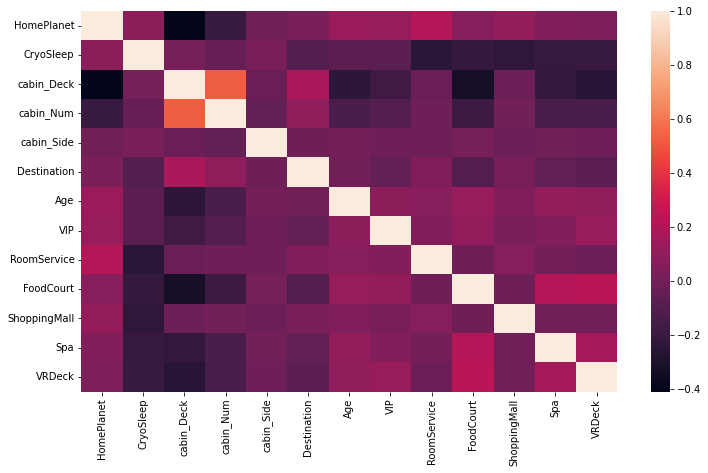

In [139]:
plt.figure(figsize=(12,7))
torr = X_train.corr()
sns.heatmap(torr)

<div style="color:white;display:fill;border-radius:8px;
            background-color:black;font-size:200%;
            font-family:Nexa;letter-spacing:0.7px;height:60px;padding:10px">
    <p style="padding: 8px;color:white;text-align:center"><b>Modeling Process</b></p>
</div>

### The process of developing an effective model is both iterative and heuristic. It is difficult to know the needs of any data set prior to working with it and it is common for many approaches to be evaluated and modified before a model can be finalized. A typical modeling process is shown below

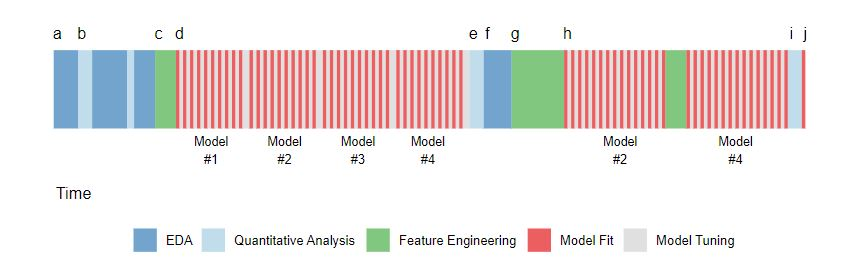

In [140]:
logrcv = LogisticRegressionCV(Cs=[1,3,5,7,10], cv=5, penalty='l2', random_state=2022)

In [141]:
y_train

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8682, dtype: bool

In [142]:
y_train = y_train.apply(lambda x : 1.0 if x == True else 0.0)

In [143]:
y_train.value_counts()

1.0    4373
0.0    4309
Name: Transported, dtype: int64

In [144]:
fitted = logrcv.fit(X= X_train, y = y_train)

In [145]:
fitted.C_

array([1])

In [146]:
fitted.scores_

{1.0: array([[0.7697179 , 0.7691422 , 0.7691422 , 0.7691422 , 0.7691422 ],
        [0.77835348, 0.77777778, 0.77777778, 0.77777778, 0.77777778],
        [0.7937788 , 0.7937788 , 0.7937788 , 0.7937788 , 0.7937788 ],
        [0.77880184, 0.77880184, 0.77880184, 0.77880184, 0.77880184],
        [0.78110599, 0.78110599, 0.78110599, 0.78110599, 0.78110599]])}

In [147]:
fitted.coef_

array([[ 0.26366941,  1.52542451, -0.36949818,  0.15647177,  0.56401001,
        -0.22474884, -0.12507429, -0.36313479, -0.9768555 ,  0.89776892,
         0.26706235, -1.99651365, -1.79758115]])

In [148]:
logr = LogisticRegression(C=20)

In [149]:
fit_train = logr.fit(X_train, y_train)

In [150]:
predictions = fit_train.predict(test_df)

In [151]:
test_pass_id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [152]:
def generate_submission(preds):
    test_arr = np.column_stack((test_pass_id.values, preds) )
    test_predict = pd.DataFrame(columns = ['PassengerId', 'Transported'], data = test_arr)
    test_predict.Transported = test_predict.Transported.apply(lambda x : True if x == 1.0 else False)
    test_predict.head()
    test_predict.to_csv('submission.csv', index=False)

In [153]:
generate_submission(predictions)

### Classification score is: 0.78770 

### We can improve it further

###  Till now, I have set up the data good enough for training a model. Steps were to Explore the data through visualization, Handle missing data (filled the data with mode/mean), perform one hot encoding on categorical variables, normalize numeric data. Now, let's do some feature engineering to try to boost the performance with the help of the data.

## Let's try different algorithms 
### 1. Knearest Neighbors
### 2. Decision Trees
### 3. Random Forests
### 4. Support Vector Machines
### 5. XGBoost
### 6. Neural Networks

# KNN

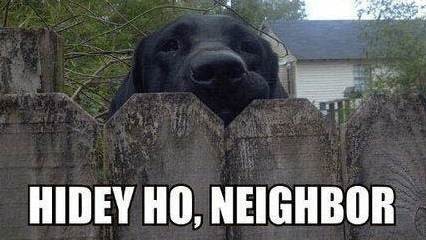

In [159]:
X_train.iloc[result[0]]

HomePlanet CryoSleep cabin_Deck  cabin_Num cabin_Side    Destination  \
1738      Earth     False          F      356.0          S    55 Cancri e   
1739      Earth      True          G      302.0          P    TRAPPIST-1e   
1740     Europa     False          A       22.0          S    55 Cancri e   
1741      Earth      True          G      303.0          P    TRAPPIST-1e   
1742      Earth     False          E      113.0          P    TRAPPIST-1e   
...         ...       ...        ...        ...        ...            ...   
8688     Europa     False          A       98.0          P    55 Cancri e   
8689      Earth      True          G     1499.0          S  PSO J318.5-22   
8690      Earth     False          G     1500.0          S    TRAPPIST-1e   
8691     Europa     False          E      608.0          S    55 Cancri e   
8692     Europa     False          E      608.0          S    TRAPPIST-1e   

       Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
1738  25.0  False          0.0        0.0           1.0   735.0    25.0   
1739  14.0  False          0.0        0.0           0.0     0.0     0.0   
1740  53.0  False          0.0    13527.0           0.0     0.0   771.0   
1741   0.0  False          0.0        0.0           0.0     0.0     0.0   
1742  39.0  False          0.0       43.0         864.0     0.0    85.0   
...    ...    ...          ...        ...           ...     ...     ...   
8688  41.0   True          0.0     6819.0           0.0  1643.0    74.0   
8689  18.0  False          0.0        0.0           0.0     0.0     0.0   
8690  26.0  False          0.0        0.0        1872.0     1.0     0.0   
8691  32.0  False          0.0     1049.0           0.0   353.0  3235.0   
8692  44.0  False        126.0     4688.0           0.0     0.0    12.0   

      Transported  
1738        False  
1739         True  
1740         True  
1741         True  
1742        False  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[6945 rows x 14 columns]

In [155]:
X_train = X_train
Y_train = y_train

TRAIN_SCORES = []
VALID_SCORES  = [] 


params = list(range(1,20))

classifier = KNeighborsClassifier()

folds = 5

kf = KFold(n_splits=folds)

for p in params:

    training_scores = []
    crossval_scores = []
    classifier.n_neighbors = p

    for i in range(folds):
        
        result = next(kf.split(X_train),None)
        x_training = X_train.iloc[result[0]]
        x_cv = X_train.iloc[result[1]]

        y_training = y_train.iloc[result[0]]
        y_cv = y_train.iloc[result[1]]
      
        model = classifier.fit(x_training,y_training)
        training_scores.append(model.score(x_training,y_training))
        crossval_scores.append(model.score(x_cv,y_cv))
    TRAIN_SCORES.append(np.mean(training_scores))
    VALID_SCORES.append(np.mean(crossval_scores))

ValueError: could not convert string to float: 'Earth'

In [ ]:
plt.plot(params,TRAIN_SCORES, label='train cruve')
plt.plot(params,VALID_SCORES, label='test cruve')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title('Hyper-parameter VS accuracy plot')

In [ ]:
np.argmax(np.array(VALID_SCORES))

In [ ]:
# Looks like the best neighbor is 5
KNN_best = KNeighborsClassifier(18,weights='uniform', )
model_best = KNN_best.fit(train_df, y_train)

preds = model_best.predict(test_df)


In [ ]:
model_best.get_params()

In [ ]:
generate_submission(preds)

# Decision Tree Classifier

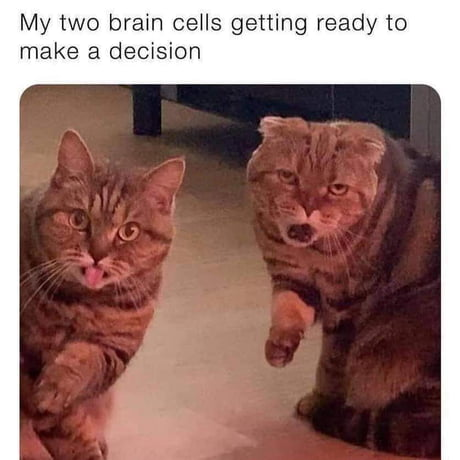

In [ ]:
params_dict = {'criterion':['gini', 'entropy'],
              'max_depth': [10,20,30,40,50,60],
              'min_samples_split':[0.1,0.3,0.5,0.6]}

In [ ]:
clf =  DecisionTreeClassifier(random_state=2022)

In [ ]:
grid_clf = GridSearchCV(clf, param_grid=params_dict,cv=5, verbose=1, refit=True)

In [ ]:
grid_clf.fit(X=train_df, y =  y_train)

In [ ]:
grid_clf.best_params_

In [ ]:
grid_clf.predict(test_df)

In [ ]:
generate_submission(grid_clf.predict(test_df))

# Random Forest Classifier

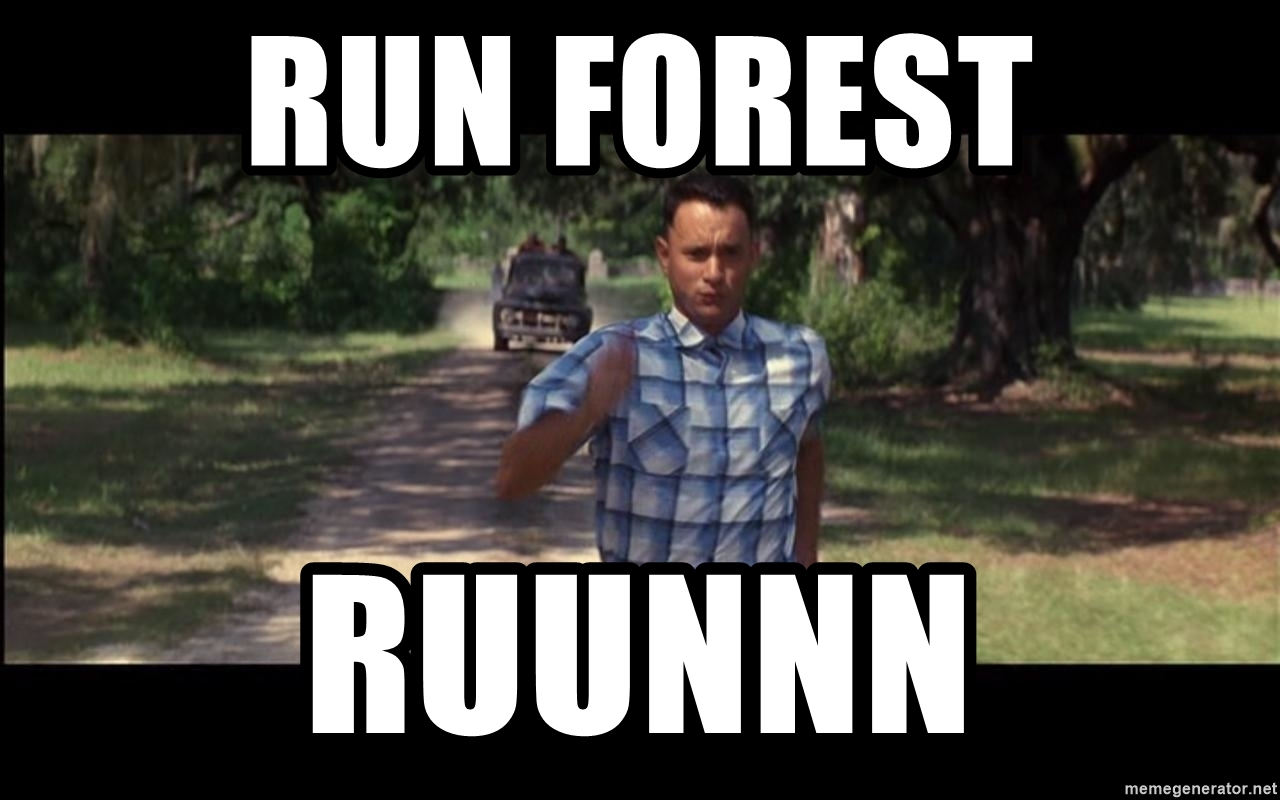

In [ ]:
params_dict_rf = {'max_depth': [8,10,12,14,20],
                  'min_samples_leaf':[0.1,0.3,0.5,0.6],
                  'n_estimators':[100, 200, 400, 500]}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


In [ ]:
#grid_rf = GridSearchCV(rf, param_grid=params_dict_rf)
#grid_rf.fit(X = train_df, y = y_train)

In [ ]:
#grid_rf.best_estimator_

In [ ]:
#grid_rf.best_params_

In [ ]:
#grid_rf.feature_names_in_

In [ ]:
rf = RandomForestClassifier(n_estimators=400, max_depth=18, min_samples_leaf=0.001, bootstrap=True,
                            oob_score=True, random_state=420, verbose=0)
rf.fit(X=train_df, y =y_train)
rf.oob_score_

In [ ]:
generate_submission(rf.predict(test_df))

# Support Vector Machines

In [ ]:
from sklearn.svm import SVC, NuSVC

In [ ]:
grid_svc = {'C': [1,2,3,5,8,10],
           'kernel': ['linear', 'rbf'],
           'gamma': ['auto','scale']}

In [ ]:
svc = SVC()

In [ ]:
grid_svc = GridSearchCV(svc, param_grid=grid_svc)

In [ ]:
#grid_svc.fit(X=train_df, y = y_train)

In [ ]:
#grid_svc.best_estimator_

In [ ]:
#grid_svc.best_score_

In [ ]:
#grid_svc.feature_names_in_

In [ ]:
svc = SVC(C=10,kernel='linear')

In [ ]:
svc.fit(X=train_df, y=y_train)

In [ ]:
svc.fit_status_

In [ ]:
svc.n_support_

In [ ]:
svc_predictions = svc.predict(test_df)

In [ ]:
svc_predictions

In [ ]:
generate_submission(svc_predictions)

# XgBoost Classifier

In [ ]:
import xgboost as xgb
from xgboost import cv
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
from scipy.stats import uniform, randint
params = {
    "colsample_bytree": [0.5,0.7,0.8,0.9],
    "learning_rate": [0.3,0.5,0.7,0.8,0.9], # default 0.1 
    "max_depth": [5,6,7,8,10] # default 3 
}

In [ ]:
xgb_clf = xgb.XGBClassifier()

In [ ]:
search = GridSearchCV(xgb_clf, param_grid=params,  refit =True, 
                      cv=3, verbose=1, n_jobs=1,return_train_score=True)
search.fit(train_df, y_train)

In [ ]:
search.best_estimator_

In [ ]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report_best_scores(search.cv_results_,3)

In [ ]:
data_dmatrix = xgb.DMatrix(data=train_df,label=y_train)

In [ ]:

params = {
    'booster': 'gbtree',
    'learning_rate': 0.3,
    'colsample_bytree': 0.4
}
xgb_cv = cv(dtrain=data_dmatrix, 
            params=params, 
            nfold=5, 
            num_boost_round=50, 
            early_stopping_rounds=5, 
            metrics="logloss", 
            as_pandas=True, 
            seed=1)

In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators = 1000,
                           objective='binary:logistic',
                           max_depth = 3,
                           min_child_weight = 5,
                           learning_rate = 0.9, 
                           early_stopping_rounds=5)

In [ ]:
X_train, XVal, yTrain, yVal = train_test_split(train_df, y_train, random_state=19, test_size=0.2)

In [ ]:
xgb_clf.fit(X=train_df, y = y_train, eval_set=[(XVal, yVal)] )

In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators = 795,
                           objective='binary:logistic',
                           max_depth = 4,
                           min_child_weight = 2,
                           colsample_bytree=0.7,
                           learning_rate = 0.9, 
                           )

In [ ]:
xgb_clf.fit(train_df, y_train)

In [ ]:
xgb_clf.predict(test_df)
generate_submission(xgb_clf.predict(test_df))

In [ ]:
parameters = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 
              "n_estimators": [200, 350, 500, 750],
              "max_depth": [3, 6, 8]
              }

In [ ]:
from sklearnex.ensemble import GradientBoostingClassifier

In [ ]:
GridSearchCV_gbcl = GridSearchCV(estimator=GradientBoostingClassifier(), 
                                param_grid=parameters, 
                                cv=10,
                                verbose=1, 
                                n_jobs=3,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [ ]:
GridSearchCV_gbcl.fit(train_df, y_train)

In [ ]:
GridSearchCV_gbcl.best_estimator_

In [ ]:
GridSearchCV_gbcl.best_params_

In [ ]:
GridSearchCV_gbcl.best_score_

In [ ]:
gbcl= GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=200)

In [ ]:
gbcl_fit = gbcl.fit(train_df, y_train)

In [ ]:
generate_submission(gbcl_fit.predict(test_df))

## New Score - 0.80500

# Neural Networks

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, ReLU, Dropout, Flatten
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import plot_model

In [ ]:
import os
import tensorflow as tf

# If there are multiple GPUs and we only want to use one/some, set the number in the visible device list.
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
train_df.shape

In [ ]:
Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(train_df, y_train, test_size=0.3, random_state=2022)

In [ ]:
print(f'Train data shape: {Xtrain.shape}' )
print(f'Val data shape: {Xtemp.shape}' )

In [ ]:
test_df.shape

In [ ]:
# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

In [ ]:
# Lets define a help function for plotting the training results

import matplotlib.pyplot as plt
def plot_results(history):
    
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

### Configuration for neural network

In [ ]:
batch_size = 200
epochs = 70
optimizer = Adam(learning_rate=0.001)
input_shape = (X_train.shape[1],)

In [ ]:
x_in = Input(shape=input_shape)
x = Flatten()(x_in)
x = Dense(32, 'relu')(x_in)
x = Dense(32)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(64)(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(64)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(64)(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.4)(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(1,'sigmoid')(x)

In [ ]:
model = Model(inputs = x_in, outputs=x)

In [ ]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

In [ ]:
plot_model(model)

In [ ]:
history = model.fit(x = Xtrain, y = Ytrain, validation_data=(Xtemp, Ytemp), epochs=epochs, batch_size = batch_size)

In [ ]:
plot_results(history)

In [ ]:
preds = model.predict(test_df)

In [ ]:
preds = np.array(list(map(lambda x: 1 if x >= 0.5 else 0, preds )))

In [ ]:
generate_submission(preds)